# Jaedyn's Jupyter Notebook
## CLIM 680 Final Project: Looking at the Anomalies for the Sea Surface Temperature and Sea Surface Salinity from 2001 to 2024.
##### The following data is analyzed Argo data from JMASTEC (Japan Agency for Marine-Earth Science and Technology). The temperature and salinity profiles are obtained from Argo floats. The Argo floats drift with the ocean currents. The floats descend to 2,000 meters every 10 days and collect a vertical profile of temperature and salinity.


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import tarfile
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

/home/jwill96/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


### The following data is the NOAA ERSST V5 SST anomalies for Nino 3.4. 
##### Nino 3.4 is the SST for the East Central Tropical Pacific. 
https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.91-20.ascii
https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

In [2]:
ds = pd.read_csv('nina34.data.txt', header=None, delim_whitespace=True, index_col = 0)
#ds

/tmp/ipykernel_931071/2105098720.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv('nina34.data.txt', header=None, delim_whitespace=True, index_col = 0)


In [3]:
ds.columns = ['Jan','Feb','March','April','May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] 
ds = ds.rename_axis('Year')
#ds

In [4]:
# Calculate the mean for each column and group by each month
ds.groupby('Year').mean()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
2001,25.81,26.12,26.80,27.33,27.60,27.54,27.25,26.80,26.52,26.57,26.33,26.19
2002,26.39,26.71,27.29,27.84,28.24,28.44,28.03,27.72,27.81,27.96,28.17,27.97
2003,27.15,27.39,27.65,27.68,27.32,27.44,27.50,27.11,26.99,27.14,27.04,27.03
2004,26.81,26.98,27.40,27.89,28.00,27.86,27.78,27.62,27.53,27.44,27.36,27.34
2005,27.21,27.11,27.73,28.08,28.24,27.77,27.06,26.80,26.68,26.65,26.11,25.68
2006,25.63,26.08,26.57,27.50,27.85,27.73,27.30,27.16,27.32,27.41,27.69,27.74
2007,27.24,26.88,27.10,27.50,27.46,27.37,26.71,26.14,25.61,25.32,25.17,25.01
2008,24.86,25.08,26.07,26.83,27.09,27.04,26.99,26.72,26.47,26.37,26.25,25.74
2009,25.66,25.96,26.59,27.47,27.99,28.04,27.78,27.42,27.40,27.60,28.16,28.34


Text(0, 0.5, 'Nino 3.4 Average SST')

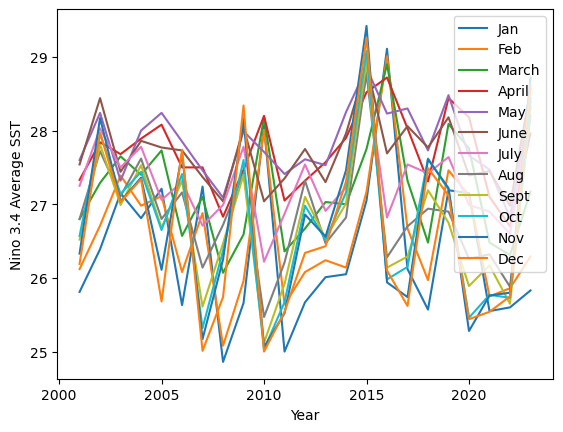

In [5]:
ds.plot()
plt.ylabel('Nino 3.4 Average SST')

In [6]:
year_mean = ds.mean(axis=1)
#year_mean

Text(0, 0.5, 'Average SST')

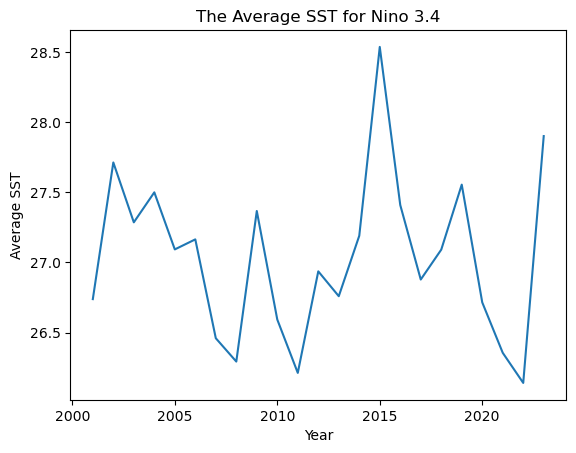

In [7]:
year_mean.plot()
plt.title('The Average SST for Nino 3.4')
plt.ylabel('Average SST')

In [8]:
avg_per_month = np. mean(ds, axis=0)
avg_per_month

Jan      26.379565
Feb      26.596522
March    27.160870
April    27.700870
May      27.836087
June     27.722609
July     27.310870
Aug      26.871739
Sept     26.754348
Oct      26.750000
Nov      26.749130
Dec      26.634783
dtype: float64

Text(0.5, 1.0, 'Monthly Average SST for Nino 3.4')

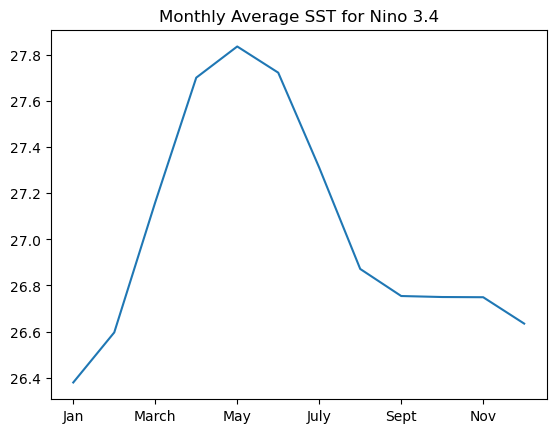

In [9]:
avg_per_month.plot()

plt.title('Monthly Average SST for Nino 3.4')

In [10]:
da_year = xr.DataArray.from_series(year_mean)
da_year

<xarray.DataArray (Year: 23)> Size: 184B
array([26.73833333, 27.71416667, 27.28666667, 27.50083333, 27.09333333,
       27.165     , 26.45916667, 26.2925    , 27.3675    , 26.5925    ,
       26.21166667, 26.93666667, 26.75916667, 27.19083333, 28.53916667,
       27.41      , 26.87833333, 27.09166667, 27.55583333, 26.715     ,
       26.355     , 26.14      , 27.9025    ])
Coordinates:
  * Year     (Year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023

In [11]:
mean_value = da_year.mean()
mean_value

<xarray.DataArray ()> Size: 8B
np.float64(27.038949275362324)

In [12]:
anomaly = da_year - mean_value
anomaly 

<xarray.DataArray (Year: 23)> Size: 184B
array([-0.30061594,  0.67521739,  0.24771739,  0.46188406,  0.05438406,
        0.12605072, -0.57978261, -0.74644928,  0.32855072, -0.44644928,
       -0.82728261, -0.10228261, -0.27978261,  0.15188406,  1.50021739,
        0.37105072, -0.16061594,  0.05271739,  0.51688406, -0.32394928,
       -0.68394928, -0.89894928,  0.86355072])
Coordinates:
  * Year     (Year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023

In [13]:
positive=anomaly.where(anomaly>0.5) 
negative=anomaly.where(anomaly<-0.5)
neutral=anomaly.where((anomaly>-0.5) & (anomaly<0.5))
negative

<xarray.DataArray (Year: 23)> Size: 184B
array([        nan,         nan,         nan,         nan,         nan,
               nan, -0.57978261, -0.74644928,         nan,         nan,
       -0.82728261,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -0.68394928, -0.89894928,         nan])
Coordinates:
  * Year     (Year) int64 184B 2001 2002 2003 2004 2005 ... 2020 2021 2022 2023

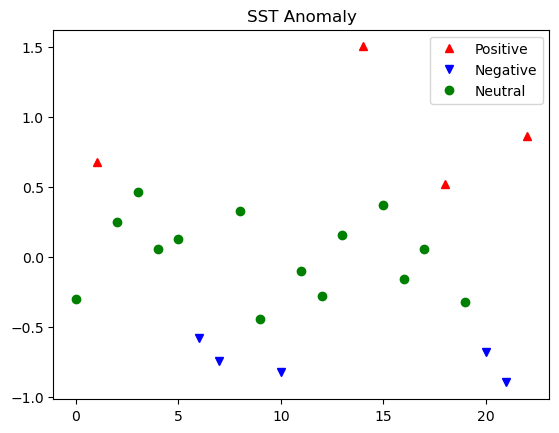

In [14]:
plt.plot(positive, marker = '^', color = 'red', linestyle = 'none', label = 'Positive')
plt.plot(negative,'bv', label = 'Negative')
plt.plot(neutral,'go', label = 'Neutral')
plt.title('SST Anomaly')
plt.legend()

Positive:  4
Neutral:  14
Negative:  5
[array(4), array(5), array(14)]


/tmp/ipykernel_931071/4184224211.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


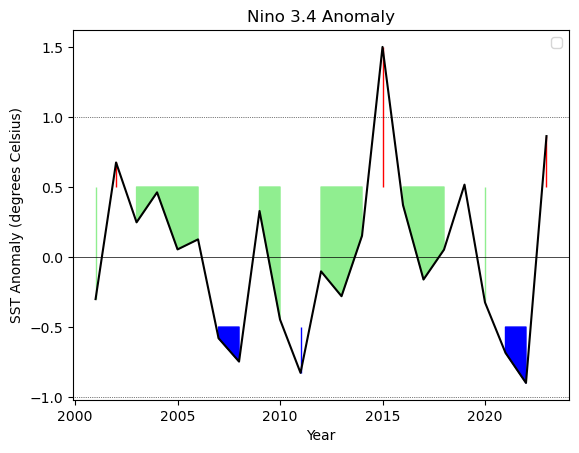

In [15]:
 print('Positive: ',positive.count(dim='Year').values)
print('Neutral: ',neutral.count(dim='Year').values)
print('Negative: ',negative.count(dim='Year').values)

counts=[positive.count(dim='Year').values,
        negative.count(dim='Year').values,
        neutral.count(dim='Year').values]
print(counts)

plt.plot(anomaly['Year'],anomaly,'k')
plt.fill_between(anomaly['Year'].values,neutral,y2 = 0.5, color='lightgreen')
plt.fill_between(anomaly['Year'].values,positive,y2=0.50,color='red')
plt.fill_between(anomaly['Year'].values,negative,y2=-0.50,color='blue')
plt.title('Nino 3.4 Anomaly')
plt.xlabel('Year')
plt.ylabel('SST Anomaly (degrees Celsius)')
plt.legend()

plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;
plt.savefig('Nino 3.4 Anomaly.png', dpi=100)

### JAMSTEC Argo Float Data from 2024 (January-May)

In [16]:
src_url = 'https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/' 
year_24 = '2024'
months_24 = ['01', '02', '03','04', '05']

In [17]:
ds_2024 =[]

for i in months_24:
    date = year_24 + i
    filename = 'TS_' + year_24 + i + '_GLB.nc'
    
    print(filename)
    dl_link = src_url + filename
    
    ds_list_2024 = xr.open_dataset(dl_link)
    ds_2024.append(ds_list_2024)

TS_202401_GLB.nc
TS_202402_GLB.nc
TS_202403_GLB.nc
TS_202404_GLB.nc
TS_202405_GLB.nc


In [18]:
ds241 = ds_2024[0]
ds242 = ds_2024[1]
ds243 = ds_2024[2]
ds244 = ds_2024[3]
ds245 = ds_2024[4]

In [19]:
ds241 = ds241.sortby(ds241['LONGITUDE'])
ds242 = ds242.sortby(ds242['LONGITUDE'])
ds243 = ds243.sortby(ds243['LONGITUDE'])
ds244 = ds244.sortby(ds244['LONGITUDE'])
ds245 = ds245.sortby(ds245['LONGITUDE'])

In [20]:
ds_2024 = [ds241, ds242, ds243, ds244, ds245]
#ds_2024

## JAMSTEC ARGO FLOAT Data from 2023

In [21]:
src_url = 'https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/' 
year = '2023'
months = months = ['01', '02', '03','04', '05', '06', '07', '08', '09','10', '11', '12']

In [22]:
ds_2023 =[]

for i in months:
    date = year + i
    filename = 'TS_' + year + i + '_GLB.nc'
    
    print(filename)
    dl_link = src_url + filename
    
    ds = xr.open_dataset(dl_link)
    ds_2023.append(ds)

TS_202301_GLB.nc
TS_202302_GLB.nc
TS_202303_GLB.nc
TS_202304_GLB.nc
TS_202305_GLB.nc
TS_202306_GLB.nc
TS_202307_GLB.nc
TS_202308_GLB.nc
TS_202309_GLB.nc
TS_202310_GLB.nc
TS_202311_GLB.nc
TS_202312_GLB.nc


In [23]:
ds231 = ds_2023[0]
ds232 = ds_2023[1]
ds233 = ds_2023[2]
ds234 = ds_2023[3]
ds235 = ds_2023[4]
ds236 = ds_2023[5]
ds237 = ds_2023[6]
ds238 = ds_2023[7]
ds239 = ds_2023[8]
ds2310 = ds_2023[9]
ds2311 = ds_2023[10]
ds2312 = ds_2023[11]
ds_2023 = [ds231, ds232, ds233, ds234, ds235, ds236, ds237, ds238, ds239, ds2310, ds2311, ds2312]
#ds_2023

## The following are the datasets for January from 2001 to 2022

In [24]:
ds11 = xr.open_dataset('TS_200101_GLB.nc')
ds21 = xr.open_dataset('TS_200201_GLB.nc')
ds31 = xr.open_dataset('TS_200301_GLB.nc')
ds41 = xr.open_dataset('TS_200401_GLB.nc')
ds51 = xr.open_dataset('TS_200501_GLB.nc')
ds61 = xr.open_dataset('TS_200601_GLB.nc')
ds71 = xr.open_dataset('TS_200701_GLB.nc')
ds81 = xr.open_dataset('TS_200801_GLB.nc')
ds91 = xr.open_dataset('TS_200901_GLB.nc')
ds101 = xr.open_dataset('TS_201001_GLB.nc')
ds111 = xr.open_dataset('TS_201101_GLB.nc')
ds121 = xr.open_dataset('TS_201201_GLB.nc')
ds131 = xr.open_dataset('TS_201301_GLB.nc')
ds141 = xr.open_dataset('TS_201401_GLB.nc')
ds151 = xr.open_dataset('TS_201501_GLB.nc')
ds161 = xr.open_dataset('TS_201601_GLB.nc')
ds171 = xr.open_dataset('TS_201701_GLB.nc')
ds181 = xr.open_dataset('TS_201801_GLB.nc')
ds191 = xr.open_dataset('TS_201901_GLB.nc')
ds201 = xr.open_dataset('TS_202001_GLB.nc')
ds211 = xr.open_dataset('TS_202101_GLB.nc')
ds221 = xr.open_dataset('TS_202201_GLB.nc')

In [25]:
ds11 = ds11.sortby(ds11['LONGITUDE'])
ds21 = ds21.sortby(ds21['LONGITUDE'])
ds31 = ds31.sortby(ds31['LONGITUDE'])
ds41 = ds41.sortby(ds41['LONGITUDE'])
ds51 = ds51.sortby(ds51['LONGITUDE'])
ds61 = ds61.sortby(ds61['LONGITUDE'])
ds71 = ds71.sortby(ds71['LONGITUDE'])
ds81 = ds81.sortby(ds81['LONGITUDE'])
ds91 = ds91.sortby(ds91['LONGITUDE'])
ds101 = ds101.sortby(ds101['LONGITUDE'])
ds111 = ds111.sortby(ds111['LONGITUDE'])
ds121 = ds121.sortby(ds121['LONGITUDE'])
ds131 = ds131.sortby(ds131['LONGITUDE'])
ds141 = ds141.sortby(ds141['LONGITUDE'])
ds151 = ds151.sortby(ds151['LONGITUDE'])
ds161 = ds161.sortby(ds161['LONGITUDE'])
ds171 = ds171.sortby(ds171['LONGITUDE'])
ds181 = ds181.sortby(ds181['LONGITUDE'])
ds191 = ds191.sortby(ds191['LONGITUDE'])
ds201 = ds201.sortby(ds201['LONGITUDE'])
ds211 = ds211.sortby(ds211['LONGITUDE'])
ds221 = ds221.sortby(ds221['LONGITUDE'])
ds231 = ds231.sortby(ds231['LONGITUDE'])
ds241 = ds241.sortby(ds241['LONGITUDE'])
jan_total = [ds11, ds21, ds31, ds41, ds51, ds61, ds71, ds81, ds91, ds101, ds111, ds121, ds131, ds141, ds151, ds161, ds171, ds181, ds191, ds201, ds211, ds221, ds231, ds241]

## The following are the datasets for Feb from 2001 to 2022

In [26]:
ds12 = xr.open_dataset('TS_200102_GLB.nc')
ds22 = xr.open_dataset('TS_200202_GLB.nc')
ds32 = xr.open_dataset('TS_200302_GLB.nc')
ds42 = xr.open_dataset('TS_200402_GLB.nc')
ds52 = xr.open_dataset('TS_200502_GLB.nc')
ds62 = xr.open_dataset('TS_200602_GLB.nc')
ds72 = xr.open_dataset('TS_200702_GLB.nc')
ds82 = xr.open_dataset('TS_200802_GLB.nc')
ds92 = xr.open_dataset('TS_200902_GLB.nc')
ds102 = xr.open_dataset('TS_201002_GLB.nc')
ds112 = xr.open_dataset('TS_201102_GLB.nc')
ds122 = xr.open_dataset('TS_201202_GLB.nc')
ds132 = xr.open_dataset('TS_201302_GLB.nc')
ds142 = xr.open_dataset('TS_201402_GLB.nc')
ds152 = xr.open_dataset('TS_201502_GLB.nc')
ds162 = xr.open_dataset('TS_201602_GLB.nc')
ds172 = xr.open_dataset('TS_201702_GLB.nc')
ds182 = xr.open_dataset('TS_201802_GLB.nc')
ds192 = xr.open_dataset('TS_201902_GLB.nc')
ds202 = xr.open_dataset('TS_202002_GLB.nc')
ds212 = xr.open_dataset('TS_202102_GLB.nc')
ds222 = xr.open_dataset('TS_202202_GLB.nc')

In [27]:
ds12 = ds12.sortby(ds12['LONGITUDE'])
ds22 = ds22.sortby(ds22['LONGITUDE'])
ds32 = ds32.sortby(ds32['LONGITUDE'])
ds42 = ds42.sortby(ds42['LONGITUDE'])
ds52 = ds52.sortby(ds52['LONGITUDE'])
ds62 = ds62.sortby(ds62['LONGITUDE'])
ds72 = ds72.sortby(ds72['LONGITUDE'])
ds82 = ds82.sortby(ds82['LONGITUDE'])
ds92 = ds92.sortby(ds92['LONGITUDE'])
ds102 = ds102.sortby(ds102['LONGITUDE'])
ds112 = ds112.sortby(ds112['LONGITUDE'])
ds122 = ds122.sortby(ds122['LONGITUDE'])
ds132 = ds132.sortby(ds132['LONGITUDE'])
ds142 = ds142.sortby(ds142['LONGITUDE'])
ds152 = ds152.sortby(ds152['LONGITUDE'])
ds162 = ds162.sortby(ds162['LONGITUDE'])
ds172 = ds172.sortby(ds172['LONGITUDE'])
ds182 = ds182.sortby(ds182['LONGITUDE'])
ds192 = ds192.sortby(ds192['LONGITUDE'])
ds202 = ds202.sortby(ds202['LONGITUDE'])
ds212 = ds212.sortby(ds212['LONGITUDE'])
ds222 = ds222.sortby(ds222['LONGITUDE'])
ds232 = ds232.sortby(ds232['LONGITUDE'])
ds242 = ds242.sortby(ds242['LONGITUDE'])
feb_total = [ds12, ds22, ds32, ds42, ds52, ds62, ds72, ds82, ds92, ds102, ds112, ds122, ds132, ds142, ds152, ds162, ds172, ds182, ds192, ds202, ds212, ds222, ds232, ds242]

## The following are the datasets for March from 2001 to 2022

In [28]:
ds13 = xr.open_dataset('TS_200103_GLB.nc')
ds23= xr.open_dataset('TS_200203_GLB.nc')
ds33 = xr.open_dataset('TS_200303_GLB.nc')
ds43 = xr.open_dataset('TS_200403_GLB.nc')
ds53 = xr.open_dataset('TS_200503_GLB.nc')
ds63 = xr.open_dataset('TS_200603_GLB.nc')
ds73 = xr.open_dataset('TS_200703_GLB.nc')
ds83 = xr.open_dataset('TS_200803_GLB.nc')
ds93 = xr.open_dataset('TS_200903_GLB.nc')
ds103 = xr.open_dataset('TS_201003_GLB.nc')
ds113 = xr.open_dataset('TS_201103_GLB.nc')
ds123 = xr.open_dataset('TS_201203_GLB.nc')
ds133 = xr.open_dataset('TS_201303_GLB.nc')
ds143 = xr.open_dataset('TS_201403_GLB.nc')
ds153 = xr.open_dataset('TS_201503_GLB.nc')
ds163= xr.open_dataset('TS_201603_GLB.nc')
ds173 = xr.open_dataset('TS_201703_GLB.nc')
ds183 = xr.open_dataset('TS_201803_GLB.nc')
ds193 = xr.open_dataset('TS_201903_GLB.nc')
ds203 = xr.open_dataset('TS_202003_GLB.nc')
ds213 = xr.open_dataset('TS_202103_GLB.nc')
ds223 = xr.open_dataset('TS_202203_GLB.nc')

In [29]:
ds13 = ds13.sortby(ds13['LONGITUDE'])
ds23 = ds23.sortby(ds23['LONGITUDE'])
ds33 = ds33.sortby(ds33['LONGITUDE'])
ds43 = ds43.sortby(ds43['LONGITUDE'])
ds53 = ds53.sortby(ds53['LONGITUDE'])
ds63 = ds63.sortby(ds63['LONGITUDE'])
ds73 = ds73.sortby(ds73['LONGITUDE'])
ds83 = ds83.sortby(ds83['LONGITUDE'])
ds93 = ds93.sortby(ds93['LONGITUDE'])
ds103 = ds103.sortby(ds103['LONGITUDE'])
ds113 = ds113.sortby(ds113['LONGITUDE'])
ds123 = ds123.sortby(ds123['LONGITUDE'])
ds133 = ds133.sortby(ds133['LONGITUDE'])
ds143 = ds143.sortby(ds143['LONGITUDE'])
ds153 = ds153.sortby(ds153['LONGITUDE'])
ds163 = ds163.sortby(ds163['LONGITUDE'])
ds173 = ds173.sortby(ds173['LONGITUDE'])
ds183 = ds183.sortby(ds183['LONGITUDE'])
ds193 = ds193.sortby(ds193['LONGITUDE'])
ds203 = ds203.sortby(ds203['LONGITUDE'])
ds213 = ds213.sortby(ds213['LONGITUDE'])
ds223 = ds223.sortby(ds223['LONGITUDE'])
ds233 = ds233.sortby(ds233['LONGITUDE'])
ds243 = ds243.sortby(ds243['LONGITUDE'])
march_total = [ds13, ds23, ds33, ds43, ds53, ds63, ds73, ds83, ds93, ds103, ds113, ds123, ds133, ds143, ds153, ds163, ds173, ds183, ds193, ds203, ds213, ds223, ds233, ds243]

## The following are the datasets for April from 2001 to 2024

In [30]:
ds14 = xr.open_dataset('TS_200104_GLB.nc')
ds24= xr.open_dataset('TS_200204_GLB.nc')
ds34 = xr.open_dataset('TS_200304_GLB.nc')
ds44 = xr.open_dataset('TS_200404_GLB.nc')
ds54 = xr.open_dataset('TS_200504_GLB.nc')
ds64 = xr.open_dataset('TS_200604_GLB.nc')
ds74 = xr.open_dataset('TS_200704_GLB.nc')
ds84 = xr.open_dataset('TS_200804_GLB.nc')
ds94 = xr.open_dataset('TS_200904_GLB.nc')
ds104 = xr.open_dataset('TS_201004_GLB.nc')
ds114 = xr.open_dataset('TS_201104_GLB.nc')
ds124 = xr.open_dataset('TS_201204_GLB.nc')
ds134 = xr.open_dataset('TS_201304_GLB.nc')
ds144 = xr.open_dataset('TS_201404_GLB.nc')
ds154 = xr.open_dataset('TS_201504_GLB.nc')
ds164= xr.open_dataset('TS_201604_GLB.nc')
ds174 = xr.open_dataset('TS_201704_GLB.nc')
ds184 = xr.open_dataset('TS_201804_GLB.nc')
ds194 = xr.open_dataset('TS_201904_GLB.nc')
ds204 = xr.open_dataset('TS_202004_GLB.nc')
ds214 = xr.open_dataset('TS_202104_GLB.nc')
ds224 = xr.open_dataset('TS_202204_GLB.nc')

In [31]:
ds14 = ds14.sortby(ds13['LONGITUDE'])
ds24 = ds24.sortby(ds23['LONGITUDE'])
ds34 = ds34.sortby(ds33['LONGITUDE'])
ds44 = ds44.sortby(ds43['LONGITUDE'])
ds54 = ds54.sortby(ds53['LONGITUDE'])
ds64 = ds64.sortby(ds63['LONGITUDE'])
ds74 = ds74.sortby(ds73['LONGITUDE'])
ds84 = ds84.sortby(ds83['LONGITUDE'])
ds94 = ds94.sortby(ds93['LONGITUDE'])
ds104 = ds104.sortby(ds103['LONGITUDE'])
ds114 = ds114.sortby(ds113['LONGITUDE'])
ds124 = ds124.sortby(ds123['LONGITUDE'])
ds134 = ds134.sortby(ds133['LONGITUDE'])
ds144 = ds144.sortby(ds143['LONGITUDE'])
ds154 = ds154.sortby(ds153['LONGITUDE'])
ds164 = ds164.sortby(ds163['LONGITUDE'])
ds174 = ds174.sortby(ds173['LONGITUDE'])
ds184 = ds184.sortby(ds183['LONGITUDE'])
ds194 = ds194.sortby(ds193['LONGITUDE'])
ds204 = ds204.sortby(ds203['LONGITUDE'])
ds214 = ds214.sortby(ds213['LONGITUDE'])
ds224 = ds224.sortby(ds223['LONGITUDE'])
ds234 = ds234.sortby(ds233['LONGITUDE'])
ds244 = ds244.sortby(ds243['LONGITUDE'])
april_total = [ds14, ds24, ds34, ds44, ds54, ds64, ds74, ds84, ds94, ds104, ds114, ds124, ds134, ds144, ds154, ds164, ds174, ds184, ds194, ds204, ds214, ds224, ds234, ds244]

## The following are the datasets for May from 2001 to 2024

In [32]:
ds15 = xr.open_dataset('TS_200105_GLB.nc')
ds25= xr.open_dataset('TS_200205_GLB.nc')
ds35 = xr.open_dataset('TS_200305_GLB.nc')
ds45 = xr.open_dataset('TS_200405_GLB.nc')
ds55 = xr.open_dataset('TS_200505_GLB.nc')
ds65 = xr.open_dataset('TS_200605_GLB.nc')
ds75 = xr.open_dataset('TS_200705_GLB.nc')
ds85 = xr.open_dataset('TS_200805_GLB.nc')
ds95 = xr.open_dataset('TS_200905_GLB.nc')
ds105 = xr.open_dataset('TS_201005_GLB.nc')
ds115 = xr.open_dataset('TS_201105_GLB.nc')
ds125 = xr.open_dataset('TS_201205_GLB.nc')
ds135 = xr.open_dataset('TS_201305_GLB.nc')
ds145 = xr.open_dataset('TS_201405_GLB.nc')
ds155 = xr.open_dataset('TS_201505_GLB.nc')
ds165= xr.open_dataset('TS_201605_GLB.nc')
ds175 = xr.open_dataset('TS_201705_GLB.nc')
ds185 = xr.open_dataset('TS_201805_GLB.nc')
ds195 = xr.open_dataset('TS_201905_GLB.nc')
ds205 = xr.open_dataset('TS_202005_GLB.nc')
ds215 = xr.open_dataset('TS_202105_GLB.nc')
ds225 = xr.open_dataset('TS_202205_GLB.nc')

In [33]:
ds15 = ds15.sortby(ds15['LONGITUDE'])
ds25 = ds25.sortby(ds25['LONGITUDE'])
ds35 = ds35.sortby(ds35['LONGITUDE'])
ds45 = ds45.sortby(ds45['LONGITUDE'])
ds55 = ds55.sortby(ds55['LONGITUDE'])
ds65 = ds65.sortby(ds65['LONGITUDE'])
ds75 = ds75.sortby(ds75['LONGITUDE'])
ds85 = ds85.sortby(ds85['LONGITUDE'])
ds95 = ds95.sortby(ds95['LONGITUDE'])
ds105 = ds105.sortby(ds105['LONGITUDE'])
ds115 = ds115.sortby(ds115['LONGITUDE'])
ds125 = ds125.sortby(ds125['LONGITUDE'])
ds135 = ds135.sortby(ds135['LONGITUDE'])
ds145 = ds145.sortby(ds145['LONGITUDE'])
ds155 = ds155.sortby(ds155['LONGITUDE'])
ds165 = ds165.sortby(ds165['LONGITUDE'])
ds175 = ds175.sortby(ds175['LONGITUDE'])
ds185 = ds185.sortby(ds185['LONGITUDE'])
ds195 = ds195.sortby(ds195['LONGITUDE'])
ds205 = ds205.sortby(ds205['LONGITUDE'])
ds215 = ds215.sortby(ds215['LONGITUDE'])
ds225 = ds225.sortby(ds225['LONGITUDE'])
ds235 = ds235.sortby(ds235['LONGITUDE'])
may_total = [ds15, ds25, ds35, ds45, ds55, ds65, ds75, ds85, ds95, ds105, ds115, ds125, ds135, ds145, ds155, ds165, ds175, ds185, ds195, ds205, ds215, ds225, ds235]

## The following are the datasets for June from 2001 to 2024

In [34]:
ds16 = xr.open_dataset('TS_200106_GLB.nc')
ds26= xr.open_dataset('TS_200206_GLB.nc')
ds36 = xr.open_dataset('TS_200306_GLB.nc')
ds46 = xr.open_dataset('TS_200406_GLB.nc')
ds56 = xr.open_dataset('TS_200506_GLB.nc')
ds66 = xr.open_dataset('TS_200606_GLB.nc')
ds76 = xr.open_dataset('TS_200706_GLB.nc')
ds86 = xr.open_dataset('TS_200806_GLB.nc')
ds96 = xr.open_dataset('TS_200906_GLB.nc')
ds106 = xr.open_dataset('TS_201006_GLB.nc')
ds116 = xr.open_dataset('TS_201106_GLB.nc')
ds126 = xr.open_dataset('TS_201206_GLB.nc')
ds136 = xr.open_dataset('TS_201306_GLB.nc')
ds146 = xr.open_dataset('TS_201406_GLB.nc')
ds156 = xr.open_dataset('TS_201506_GLB.nc')
ds166= xr.open_dataset('TS_201606_GLB.nc')
ds176 = xr.open_dataset('TS_201706_GLB.nc')
ds186 = xr.open_dataset('TS_201806_GLB.nc')
ds196 = xr.open_dataset('TS_201906_GLB.nc')
ds206 = xr.open_dataset('TS_202006_GLB.nc')
ds216 = xr.open_dataset('TS_202106_GLB.nc')
ds226 = xr.open_dataset('TS_202206_GLB.nc')

In [35]:
ds16 = ds16.sortby(ds16['LONGITUDE'])
ds26 = ds26.sortby(ds26['LONGITUDE'])
ds36 = ds36.sortby(ds36['LONGITUDE'])
ds46 = ds46.sortby(ds46['LONGITUDE'])
ds56 = ds56.sortby(ds56['LONGITUDE'])
ds66 = ds66.sortby(ds66['LONGITUDE'])
ds76 = ds76.sortby(ds76['LONGITUDE'])
ds86 = ds86.sortby(ds86['LONGITUDE'])
ds96 = ds96.sortby(ds96['LONGITUDE'])
ds106 = ds106.sortby(ds106['LONGITUDE'])
ds116 = ds116.sortby(ds116['LONGITUDE'])
ds126 = ds126.sortby(ds126['LONGITUDE'])
ds136 = ds136.sortby(ds136['LONGITUDE'])
ds146 = ds146.sortby(ds146['LONGITUDE'])
ds156 = ds156.sortby(ds156['LONGITUDE'])
ds166 = ds166.sortby(ds166['LONGITUDE'])
ds176 = ds176.sortby(ds176['LONGITUDE'])
ds186 = ds186.sortby(ds186['LONGITUDE'])
ds196 = ds196.sortby(ds196['LONGITUDE'])
ds206 = ds206.sortby(ds206['LONGITUDE'])
ds216 = ds216.sortby(ds216['LONGITUDE'])
ds226 = ds226.sortby(ds226['LONGITUDE'])
ds236 = ds236.sortby(ds236['LONGITUDE'])
june_total = [ds16, ds26, ds36, ds46, ds56, ds66, ds76, ds86, ds96, ds106, ds116, ds126, ds136, ds146, ds156, ds166, ds176, ds186, ds196, ds206, ds216, ds226, ds236]

## The following are the datasets for July from 2001 to 2023

In [36]:
ds17 = xr.open_dataset('TS_200107_GLB.nc')
ds27= xr.open_dataset('TS_200207_GLB.nc')
ds37 = xr.open_dataset('TS_200307_GLB.nc')
ds47 = xr.open_dataset('TS_200407_GLB.nc')
ds57 = xr.open_dataset('TS_200507_GLB.nc')
ds67 = xr.open_dataset('TS_200607_GLB.nc')
ds77 = xr.open_dataset('TS_200707_GLB.nc')
ds87 = xr.open_dataset('TS_200807_GLB.nc')
ds97 = xr.open_dataset('TS_200907_GLB.nc')
ds107 = xr.open_dataset('TS_201007_GLB.nc')
ds117 = xr.open_dataset('TS_201107_GLB.nc')
ds127 = xr.open_dataset('TS_201207_GLB.nc')
ds137 = xr.open_dataset('TS_201307_GLB.nc')
ds147 = xr.open_dataset('TS_201407_GLB.nc')
ds157 = xr.open_dataset('TS_201507_GLB.nc')
ds167= xr.open_dataset('TS_201607_GLB.nc')
ds177 = xr.open_dataset('TS_201707_GLB.nc')
ds187 = xr.open_dataset('TS_201807_GLB.nc')
ds197 = xr.open_dataset('TS_201907_GLB.nc')
ds207 = xr.open_dataset('TS_202007_GLB.nc')
ds217 = xr.open_dataset('TS_202107_GLB.nc')
ds227 = xr.open_dataset('TS_202207_GLB.nc')

In [37]:
ds17 = ds17.sortby(ds17['LONGITUDE'])
ds27 = ds27.sortby(ds27['LONGITUDE'])
ds37 = ds37.sortby(ds37['LONGITUDE'])
ds47 = ds47.sortby(ds47['LONGITUDE'])
ds57 = ds57.sortby(ds57['LONGITUDE'])
ds67 = ds67.sortby(ds67['LONGITUDE'])
ds77 = ds77.sortby(ds77['LONGITUDE'])
ds87 = ds87.sortby(ds87['LONGITUDE'])
ds97 = ds97.sortby(ds97['LONGITUDE'])
ds107 = ds107.sortby(ds107['LONGITUDE'])
ds117 = ds117.sortby(ds117['LONGITUDE'])
ds127 = ds127.sortby(ds127['LONGITUDE'])
ds137 = ds137.sortby(ds137['LONGITUDE'])
ds147 = ds147.sortby(ds147['LONGITUDE'])
ds157 = ds157.sortby(ds157['LONGITUDE'])
ds167 = ds167.sortby(ds167['LONGITUDE'])
ds177 = ds177.sortby(ds177['LONGITUDE'])
ds187 = ds187.sortby(ds187['LONGITUDE'])
ds197 = ds197.sortby(ds197['LONGITUDE'])
ds207 = ds207.sortby(ds207['LONGITUDE'])
ds217 = ds217.sortby(ds217['LONGITUDE'])
ds227 = ds227.sortby(ds227['LONGITUDE'])
ds237 = ds237.sortby(ds237['LONGITUDE'])
june_total = [ds17, ds27, ds37, ds47, ds57, ds67, ds77, ds87, ds97, ds107, ds117, ds127, ds137, ds147, ds157, ds167, ds177, ds187, ds197, ds207, ds217, ds227, ds237]

## The following are the datasets for August from 2001 to 2023

In [38]:
ds18 = xr.open_dataset('TS_200108_GLB.nc')
ds28= xr.open_dataset('TS_200208_GLB.nc')
ds38 = xr.open_dataset('TS_200308_GLB.nc')
ds48 = xr.open_dataset('TS_200408_GLB.nc')
ds58 = xr.open_dataset('TS_200508_GLB.nc')
ds68 = xr.open_dataset('TS_200608_GLB.nc')
ds78 = xr.open_dataset('TS_200708_GLB.nc')
ds88 = xr.open_dataset('TS_200808_GLB.nc')
ds98 = xr.open_dataset('TS_200908_GLB.nc')
ds108 = xr.open_dataset('TS_201008_GLB.nc')
ds118 = xr.open_dataset('TS_201108_GLB.nc')
ds128 = xr.open_dataset('TS_201208_GLB.nc')
ds138 = xr.open_dataset('TS_201308_GLB.nc')
ds148 = xr.open_dataset('TS_201408_GLB.nc')
ds158 = xr.open_dataset('TS_201508_GLB.nc')
ds168= xr.open_dataset('TS_201608_GLB.nc')
ds178 = xr.open_dataset('TS_201708_GLB.nc')
ds188 = xr.open_dataset('TS_201808_GLB.nc')
ds198 = xr.open_dataset('TS_201908_GLB.nc')
ds208 = xr.open_dataset('TS_202008_GLB.nc')
ds218 = xr.open_dataset('TS_202108_GLB.nc')
ds228 = xr.open_dataset('TS_202208_GLB.nc')

In [39]:
ds18 = ds18.sortby(ds18['LONGITUDE'])
ds28 = ds28.sortby(ds28['LONGITUDE'])
ds38 = ds38.sortby(ds38['LONGITUDE'])
ds48 = ds48.sortby(ds48['LONGITUDE'])
ds58 = ds58.sortby(ds58['LONGITUDE'])
ds68 = ds68.sortby(ds68['LONGITUDE'])
ds78 = ds78.sortby(ds78['LONGITUDE'])
ds88 = ds88.sortby(ds88['LONGITUDE'])
ds98 = ds98.sortby(ds98['LONGITUDE'])
ds108 = ds108.sortby(ds108['LONGITUDE'])
ds118= ds118.sortby(ds118['LONGITUDE'])
ds128 = ds128.sortby(ds128['LONGITUDE'])
ds138 = ds138.sortby(ds138['LONGITUDE'])
ds148 = ds148.sortby(ds148['LONGITUDE'])
ds158 = ds158.sortby(ds158['LONGITUDE'])
ds168 = ds168.sortby(ds168['LONGITUDE'])
ds178 = ds178.sortby(ds178['LONGITUDE'])
ds188 = ds188.sortby(ds188['LONGITUDE'])
ds198 = ds198.sortby(ds198['LONGITUDE'])
ds208 = ds208.sortby(ds208['LONGITUDE'])
ds218 = ds218.sortby(ds218['LONGITUDE'])
ds228 = ds228.sortby(ds228['LONGITUDE'])
ds238 = ds238.sortby(ds238['LONGITUDE'])
june_total = [ds18, ds28, ds38, ds48, ds58, ds68, ds78, ds88, ds98, ds108, ds118, ds128, ds138, ds148, ds158, ds168, ds178, ds188, ds198, ds208, ds218, ds228, ds238]

## The following are the datasets for September from 2001 to 2023

In [40]:
ds19 = xr.open_dataset('TS_200109_GLB.nc')
ds29= xr.open_dataset('TS_200209_GLB.nc')
ds39 = xr.open_dataset('TS_200309_GLB.nc')
ds49 = xr.open_dataset('TS_200409_GLB.nc')
ds59 = xr.open_dataset('TS_200509_GLB.nc')
ds69 = xr.open_dataset('TS_200609_GLB.nc')
ds79 = xr.open_dataset('TS_200709_GLB.nc')
ds89 = xr.open_dataset('TS_200809_GLB.nc')
ds99 = xr.open_dataset('TS_200909_GLB.nc')
ds109 = xr.open_dataset('TS_201009_GLB.nc')
ds119 = xr.open_dataset('TS_201109_GLB.nc')
ds129 = xr.open_dataset('TS_201209_GLB.nc')
ds139 = xr.open_dataset('TS_201309_GLB.nc')
ds149 = xr.open_dataset('TS_201409_GLB.nc')
ds159 = xr.open_dataset('TS_201509_GLB.nc')
ds169= xr.open_dataset('TS_201609_GLB.nc')
ds179 = xr.open_dataset('TS_201709_GLB.nc')
ds189 = xr.open_dataset('TS_201809_GLB.nc')
ds199 = xr.open_dataset('TS_201909_GLB.nc')
ds209 = xr.open_dataset('TS_202009_GLB.nc')
ds219 = xr.open_dataset('TS_202109_GLB.nc')
ds229 = xr.open_dataset('TS_202209_GLB.nc')

In [41]:
ds19 = ds19.sortby(ds19['LONGITUDE'])
ds29 = ds29.sortby(ds29['LONGITUDE'])
ds39 = ds39.sortby(ds39['LONGITUDE'])
ds49 = ds49.sortby(ds49['LONGITUDE'])
ds59 = ds59.sortby(ds59['LONGITUDE'])
ds69 = ds69.sortby(ds69['LONGITUDE'])
ds79 = ds79.sortby(ds79['LONGITUDE'])
ds89 = ds89.sortby(ds89['LONGITUDE'])
ds99 = ds99.sortby(ds99['LONGITUDE'])
ds109 = ds109.sortby(ds109['LONGITUDE'])
ds119= ds119.sortby(ds119['LONGITUDE'])
ds129 = ds129.sortby(ds129['LONGITUDE'])
ds139 = ds139.sortby(ds139['LONGITUDE'])
ds149 = ds149.sortby(ds149['LONGITUDE'])
ds159 = ds159.sortby(ds159['LONGITUDE'])
ds169 = ds169.sortby(ds169['LONGITUDE'])
ds179 = ds179.sortby(ds179['LONGITUDE'])
ds189 = ds189.sortby(ds189['LONGITUDE'])
ds199 = ds199.sortby(ds199['LONGITUDE'])
ds209 = ds209.sortby(ds209['LONGITUDE'])
ds219 = ds219.sortby(ds219['LONGITUDE'])
ds229 = ds229.sortby(ds229['LONGITUDE'])
ds239 = ds239.sortby(ds239['LONGITUDE'])
june_total = [ds19, ds29, ds39, ds49, ds59, ds69, ds79, ds89, ds99, ds109, ds119, ds129, ds139, ds149, ds159, ds169, ds179, ds189, ds199, ds209, ds219, ds229, ds239]

## The following are the datasets for October from 2001 to 2023

In [42]:
ds110= xr.open_dataset('TS_200110_GLB.nc')
ds210= xr.open_dataset('TS_200210_GLB.nc')
ds310 = xr.open_dataset('TS_200310_GLB.nc')
ds410= xr.open_dataset('TS_200410_GLB.nc')
ds510= xr.open_dataset('TS_200510_GLB.nc')
ds610= xr.open_dataset('TS_200610_GLB.nc')
ds710 = xr.open_dataset('TS_200710_GLB.nc')
ds810= xr.open_dataset('TS_200810_GLB.nc')
ds910= xr.open_dataset('TS_200910_GLB.nc')
ds1010 = xr.open_dataset('TS_201010_GLB.nc')
ds1110= xr.open_dataset('TS_201110_GLB.nc')
ds1210= xr.open_dataset('TS_201210_GLB.nc')
ds1310= xr.open_dataset('TS_201310_GLB.nc')
ds1410= xr.open_dataset('TS_201410_GLB.nc')
ds1510= xr.open_dataset('TS_201510_GLB.nc')
ds1610= xr.open_dataset('TS_201610_GLB.nc')
ds1710 = xr.open_dataset('TS_201710_GLB.nc')
ds1810= xr.open_dataset('TS_201810_GLB.nc')
ds1910= xr.open_dataset('TS_201910_GLB.nc')
ds2010= xr.open_dataset('TS_202010_GLB.nc')
ds2110= xr.open_dataset('TS_202110_GLB.nc')
ds2210= xr.open_dataset('TS_202210_GLB.nc')

In [43]:
ds110 = ds110.sortby(ds110['LONGITUDE'])
ds210= ds210.sortby(ds210['LONGITUDE'])
ds310= ds310.sortby(ds310['LONGITUDE'])
ds410= ds410.sortby(ds410['LONGITUDE'])
ds510= ds510.sortby(ds510['LONGITUDE'])
ds610= ds610.sortby(ds610['LONGITUDE'])
ds710= ds710.sortby(ds710['LONGITUDE'])
ds810= ds810.sortby(ds810['LONGITUDE'])
ds910= ds910.sortby(ds910['LONGITUDE'])
ds1010 = ds1010.sortby(ds1010['LONGITUDE'])
ds1110= ds1110.sortby(ds1110['LONGITUDE'])
ds1210 = ds1210.sortby(ds1210['LONGITUDE'])
ds1310= ds1310.sortby(ds1310['LONGITUDE'])
ds1410= ds1410.sortby(ds1410['LONGITUDE'])
ds1510= ds1510.sortby(ds1510['LONGITUDE'])
ds1610= ds1610.sortby(ds1610['LONGITUDE'])
ds1710= ds1710.sortby(ds1710['LONGITUDE'])
ds1810= ds1810.sortby(ds1810['LONGITUDE'])
ds1910= ds1910.sortby(ds1910['LONGITUDE'])
ds2010= ds2010.sortby(ds2010['LONGITUDE'])
ds2110= ds2110.sortby(ds2110['LONGITUDE'])
ds2210= ds2210.sortby(ds2210['LONGITUDE'])
ds2310= ds2310.sortby(ds2310['LONGITUDE'])
june_total = [ds110, ds210, ds310, ds410, ds510, ds610, ds710, ds810, ds910, ds1010, ds1110, ds1210, ds1310, ds1410, ds1510, ds1610, ds1710, ds1810, ds1910, ds2010, ds2110, ds2210, ds2310]

## The following are the datasets for November from 2001 to 2023

In [44]:
ds111= xr.open_dataset('TS_200111_GLB.nc')
ds211= xr.open_dataset('TS_200211_GLB.nc')
ds311 = xr.open_dataset('TS_200311_GLB.nc')
ds411= xr.open_dataset('TS_200411_GLB.nc')
ds511= xr.open_dataset('TS_200511_GLB.nc')
ds611= xr.open_dataset('TS_200611_GLB.nc')
ds711 = xr.open_dataset('TS_200711_GLB.nc')
ds811= xr.open_dataset('TS_200811_GLB.nc')
ds911= xr.open_dataset('TS_200911_GLB.nc')
ds1011 = xr.open_dataset('TS_201011_GLB.nc')
ds1111= xr.open_dataset('TS_201111_GLB.nc')
ds1211= xr.open_dataset('TS_201211_GLB.nc')
ds1311= xr.open_dataset('TS_201311_GLB.nc')
ds1411= xr.open_dataset('TS_201411_GLB.nc')
ds1511= xr.open_dataset('TS_201511_GLB.nc')
ds1611= xr.open_dataset('TS_201611_GLB.nc')
ds1711 = xr.open_dataset('TS_201711_GLB.nc')
ds1811= xr.open_dataset('TS_201811_GLB.nc')
ds1911= xr.open_dataset('TS_201911_GLB.nc')
ds2011= xr.open_dataset('TS_202011_GLB.nc')
ds2111= xr.open_dataset('TS_202111_GLB.nc')
ds2211= xr.open_dataset('TS_202211_GLB.nc')

In [45]:
ds111 = ds111.sortby(ds111['LONGITUDE'])
ds211= ds211.sortby(ds211['LONGITUDE'])
ds311= ds311.sortby(ds311['LONGITUDE'])
ds411= ds411.sortby(ds411['LONGITUDE'])
ds511= ds511.sortby(ds511['LONGITUDE'])
ds611= ds611.sortby(ds611['LONGITUDE'])
ds711= ds711.sortby(ds711['LONGITUDE'])
ds811= ds811.sortby(ds811['LONGITUDE'])
ds911= ds911.sortby(ds911['LONGITUDE'])
ds1011 = ds1011.sortby(ds1011['LONGITUDE'])
ds1111= ds1111.sortby(ds1111['LONGITUDE'])
ds1211 = ds1211.sortby(ds1211['LONGITUDE'])
ds1311= ds1311.sortby(ds1311['LONGITUDE'])
ds1411= ds1411.sortby(ds1411['LONGITUDE'])
ds1511= ds1511.sortby(ds1511['LONGITUDE'])
ds1611= ds1611.sortby(ds1611['LONGITUDE'])
ds1711= ds1711.sortby(ds1711['LONGITUDE'])
ds1811= ds1811.sortby(ds1811['LONGITUDE'])
ds1911= ds1911.sortby(ds1911['LONGITUDE'])
ds2011= ds2011.sortby(ds2011['LONGITUDE'])
ds2111= ds2111.sortby(ds2111['LONGITUDE'])
ds2211= ds2211.sortby(ds2211['LONGITUDE'])
ds2311= ds2311.sortby(ds2311['LONGITUDE'])
june_total = [ds111, ds211, ds311, ds411, ds511, ds611, ds711, ds811, ds911, ds1011, ds1111, ds1211, ds1311, ds1411, ds1511, ds1611, ds1711, ds1811, ds1911, ds2011, ds2111, ds2211, ds2311]

## The following are the datasets for December from 2001 to 2023

In [46]:
ds112= xr.open_dataset('TS_200112_GLB.nc')
ds212= xr.open_dataset('TS_200212_GLB.nc')
ds312 = xr.open_dataset('TS_200312_GLB.nc')
ds412= xr.open_dataset('TS_200412_GLB.nc')
ds512= xr.open_dataset('TS_200512_GLB.nc')
ds612= xr.open_dataset('TS_200612_GLB.nc')
ds712 = xr.open_dataset('TS_200712_GLB.nc')
ds812= xr.open_dataset('TS_200812_GLB.nc')
ds912= xr.open_dataset('TS_200912_GLB.nc')
ds1012 = xr.open_dataset('TS_201012_GLB.nc')
ds1112= xr.open_dataset('TS_201112_GLB.nc')
ds1212= xr.open_dataset('TS_201212_GLB.nc')
ds1312= xr.open_dataset('TS_201312_GLB.nc')
ds1412= xr.open_dataset('TS_201412_GLB.nc')
ds1512= xr.open_dataset('TS_201512_GLB.nc')
ds1612= xr.open_dataset('TS_201612_GLB.nc')
ds1712 = xr.open_dataset('TS_201712_GLB.nc')
ds1812= xr.open_dataset('TS_201812_GLB.nc')
ds1912= xr.open_dataset('TS_201912_GLB.nc')
ds2012= xr.open_dataset('TS_202012_GLB.nc')
ds2112= xr.open_dataset('TS_202112_GLB.nc')
ds2212= xr.open_dataset('TS_202212_GLB.nc')

In [47]:
ds112 = ds112.sortby(ds112['LONGITUDE'])
ds212= ds212.sortby(ds212['LONGITUDE'])
ds312= ds312.sortby(ds312['LONGITUDE'])
ds412= ds412.sortby(ds412['LONGITUDE'])
ds512= ds512.sortby(ds512['LONGITUDE'])
ds612= ds612.sortby(ds612['LONGITUDE'])
ds712= ds712.sortby(ds712['LONGITUDE'])
ds812= ds812.sortby(ds812['LONGITUDE'])
ds912= ds912.sortby(ds912['LONGITUDE'])
ds1012 = ds1012.sortby(ds1012['LONGITUDE'])
ds1112= ds1112.sortby(ds1112['LONGITUDE'])
ds1212 = ds1212.sortby(ds1212['LONGITUDE'])
ds1312= ds1312.sortby(ds1312['LONGITUDE'])
ds1412= ds1412.sortby(ds1412['LONGITUDE'])
ds1512= ds1512.sortby(ds1512['LONGITUDE'])
ds1612= ds1612.sortby(ds1612['LONGITUDE'])
ds1712= ds1712.sortby(ds1712['LONGITUDE'])
ds1812= ds1812.sortby(ds1812['LONGITUDE'])
ds1912= ds1912.sortby(ds1912['LONGITUDE'])
ds2012= ds2012.sortby(ds2012['LONGITUDE'])
ds2112= ds2112.sortby(ds2112['LONGITUDE'])
ds2212= ds2212.sortby(ds2212['LONGITUDE'])
ds2312= ds2312.sortby(ds2312['LONGITUDE'])
dec_total = [ds112, ds212, ds312, ds412, ds512, ds612, ds712, ds812, ds912, ds1012, ds1112, ds1212, ds1312, ds1412, ds1512, ds1612, ds1712, ds1812, ds1912, ds2012, ds2112, ds2212, ds2312]

## Calculating the Monthly SST Means for Climatology 2001-2023

In [48]:
# January mean SST
jan_sum = ds11 + ds21+ ds31 + ds41 + ds51+ ds61 + ds71 + ds81 + ds91 + ds101 + ds111+ ds121+ ds131+ ds141 + ds151 + ds161 + ds171 + ds181 + ds191 + ds201 + ds211 + ds221 + ds231
jan_mean = jan_sum['TOI']/23
#jan_mean

# Feb mean SST
feb_sum = ds12 + ds22+ ds32 + ds42 + ds52+ ds62 + ds72 + ds82 + ds92 + ds102 + ds112+ ds122+ ds132+ ds142 + ds152 + ds162 + ds172+ ds182+ ds192 + ds202 + ds212 + ds222 + ds232
feb_mean = feb_sum['TOI']/23
#feb_mean

# March mean SST
march_sum = ds13 + ds23+ ds33 + ds43 + ds53+ ds63 + ds73 + ds83 + ds93 + ds103 + ds113+ ds123+ ds133+ ds143 + ds153 + ds163 + ds173+ ds183+ ds193 + ds203 + ds213 + ds223+ ds233
march_mean = march_sum['TOI']/23
#march_mean

# April mean SST
april_sum = ds14 + ds24+ ds34 + ds44 + ds54+ ds64 + ds74 + ds84 + ds94 + ds104 + ds114+ ds124+ ds134+ ds144 + ds154 + ds164+ ds174+ ds184+ ds194 + ds204 + ds214 + ds224+ ds234
april_mean = april_sum['TOI']/23
#april_mean

# May mean SST
may_sum = ds15 + ds25+ ds35 + ds45 + ds55+ ds65 + ds75 + ds85 + ds95+ ds105 + ds115+ ds125+ ds135+ ds145 + ds155+ ds165+ ds175+ ds185+ ds195 + ds205 + ds215 + ds225+ ds235
may_mean = may_sum['TOI']/23
#may_mean

# June mean SST
june_sum = ds16 + ds26+ ds36 + ds46 + ds56+ ds66 + ds76 + ds86 + ds96+ ds106 + ds116+ ds126+ ds136+ ds146 + ds156+ ds166+ ds176+ ds186+ ds196 + ds206 + ds216 + ds226+ ds236
june_mean = june_sum['TOI']/23
#june_mean

# July mean SST
july_sum = ds17 + ds27+ ds37 + ds47 + ds57+ ds67 + ds77 + ds87 + ds97+ ds107 + ds117+ ds127+ ds137+ ds147 + ds157+ ds167+ ds177+ ds187+ ds197 + ds207 + ds217 + ds227+ ds237
july_mean = july_sum['TOI']/23
#july_mean

# Aug mean SST
aug_sum = ds18 + ds28+ ds38 + ds48 + ds58+ ds68 + ds78 + ds88 + ds98+ ds108 + ds118+ ds128+ ds138+ ds148 + ds158+ ds168+ ds178+ ds188+ ds198 + ds208 + ds218 + ds228+ ds238
aug_mean = aug_sum['TOI']/23
#aug_mean

# Sept mean SST
sep_sum = ds19 + ds29+ ds39 + ds49 + ds59+ ds69 + ds79 + ds89 + ds99+ ds109 + ds119+ ds129+ ds139+ ds149 + ds159+ ds169+ ds179+ ds189+ ds199 + ds209 + ds219 + ds229+ ds239
sep_mean = sep_sum['TOI']/23
#sep_mean

# Oct mean SST
oct_sum = ds110 + ds210+ ds310 + ds410 + ds510+ ds610 + ds710 + ds810 + ds910+ ds1010 + ds1110+ ds1210+ ds1310+ ds1410 + ds1510+ ds1610+ ds1710+ ds1810+ ds1910 + ds2010 + ds2110 + ds2210+ ds2310
oct_mean = oct_sum['TOI']/23
#oct_mean

# Nov mean SST
nov_sum = ds111 + ds211+ ds311 + ds411 + ds511+ ds611 + ds711 + ds811 + ds911+ ds1011 + ds1111+ ds1211+ ds1311+ ds1411 + ds1511+ ds1611+ ds1711+ ds1811+ ds1911 + ds2011 + ds2111 + ds2211+ ds2311
nov_mean = nov_sum['TOI']/23
#nov_mean

# Dec mean SST
dec_sum = ds112 + ds212+ ds312 + ds412 + ds512+ ds612 + ds712 + ds812 + ds912+ ds1012 + ds1112+ ds1212+ ds1312+ ds1412 + ds1512+ ds1612+ ds1712+ ds1812+ ds1912 + ds2012 + ds2112 + ds2212+ ds2312
dec_mean = dec_sum['TOI']/23
#dec_mean

## Calculating the Monthly SSS Means for Climatology 2001-2023

In [49]:
# Jan mean SSS
jan_sum2 = ds11 + ds21+ ds31 + ds41 + ds51+ ds61 + ds71 + ds81 + ds91 + ds101 + ds111+ ds121+ ds131+ ds141 + ds151 + ds161 + ds171 + ds181 + ds191 + ds201 + ds211 + ds221 + ds231
jan_mean2 = jan_sum2['SOI']/23
#jan_mean2

# Feb mean SSS
feb_sum2 = ds12 + ds22+ ds32 + ds42 + ds52+ ds62 + ds72 + ds82 + ds92 + ds102 + ds112+ ds122+ ds132+ ds142 + ds152 + ds162 + ds172+ ds182+ ds192 + ds202 + ds212 + ds222 + ds232
feb_mean2 = feb_sum2['SOI']/23
#feb_mean2

# March mean SSS
march_sum2 = ds13 + ds23+ ds33 + ds43 + ds53+ ds63 + ds73 + ds83 + ds93 + ds103 + ds113+ ds123+ ds133+ ds143 + ds153 + ds163 + ds173+ ds183+ ds193 + ds203 + ds213 + ds223+ ds233
march_mean2 = march_sum2['SOI']/23
#march_mean2

# April mean SSS
april_sum2 = ds14 + ds24+ ds34 + ds44 + ds54+ ds64 + ds74 + ds84 + ds94 + ds104 + ds114+ ds124+ ds134+ ds144 + ds154 + ds164+ ds174+ ds184+ ds194 + ds204 + ds214 + ds224+ ds234
april_mean2 = april_sum2['SOI']/23
#march_mean2

# May mean SSS
may_sum2 = ds15 + ds25+ ds35 + ds45 + ds55+ ds65 + ds75 + ds85 + ds95+ ds105 + ds115+ ds125+ ds135+ ds145 + ds155+ ds165+ ds175+ ds185+ ds195 + ds205 + ds215 + ds225+ ds235
may_mean2 = may_sum2['SOI']/23
#may_mean2

# June mean SSS
june_sum2 = ds16 + ds26+ ds36 + ds46 + ds56+ ds66 + ds76 + ds86 + ds96+ ds106 + ds116+ ds126+ ds136+ ds146 + ds156+ ds166+ ds176+ ds186+ ds196 + ds206 + ds216 + ds226+ ds236
june_mean2 = june_sum2['SOI']/23
#june_mean2

# July mean SSS
july_sum2 = ds17 + ds27+ ds37 + ds47 + ds57+ ds67 + ds77 + ds87 + ds97+ ds107 + ds117+ ds127+ ds137+ ds147 + ds157+ ds167+ ds177+ ds187+ ds197 + ds207 + ds217 + ds227+ ds237
july_mean2 = july_sum2['SOI']/23
#july_mean2

# Aug mean SSS
aug_sum2 = ds18 + ds28+ ds38 + ds48 + ds58+ ds68 + ds78 + ds88 + ds98+ ds108 + ds118+ ds128+ ds138+ ds148 + ds158+ ds168+ ds178+ ds188+ ds198 + ds208 + ds218 + ds228+ ds238
aug_mean2 = aug_sum2['SOI']/23
#aug_mean2

# Sept mean SSS
sep_sum2 = ds19 + ds29+ ds39 + ds49 + ds59+ ds69 + ds79 + ds89 + ds99+ ds109 + ds119+ ds129+ ds139+ ds149 + ds159+ ds169+ ds179+ ds189+ ds199 + ds209 + ds219 + ds229+ ds239
sep_mean2 = sep_sum2['SOI']/23
#sep_mean2

# Oct mean SSS
oct_sum2 = ds110 + ds210+ ds310 + ds410 + ds510+ ds610 + ds710 + ds810 + ds910+ ds1010 + ds1110+ ds1210+ ds1310+ ds1410 + ds1510+ ds1610+ ds1710+ ds1810+ ds1910 + ds2010 + ds2110 + ds2210+ ds2310
oct_mean2 = oct_sum2['SOI']/23
#oct_mean2

# Nov mean SSS
nov_sum2 = ds111 + ds211+ ds311 + ds411 + ds511+ ds611 + ds711 + ds811 + ds911+ ds1011 + ds1111+ ds1211+ ds1311+ ds1411 + ds1511+ ds1611+ ds1711+ ds1811+ ds1911 + ds2011 + ds2111 + ds2211+ ds2311
nov_mean2 = nov_sum2['SOI']/23
#nov_mean2

# Dec mean SSS
dec_sum2 = ds112 + ds212+ ds312 + ds412 + ds512+ ds612 + ds712 + ds812 + ds912+ ds1012 + ds1112+ ds1212+ ds1312+ ds1412 + ds1512+ ds1612+ ds1712+ ds1812+ ds1912 + ds2012 + ds2112 + ds2212+ ds2312
dec_mean2 = dec_sum2['SOI']/23
#dec_mean2

In [50]:
#SST Mean Climatology for 2001 to 2023
sst_clim = [jan_mean, feb_mean, march_mean, april_mean, may_mean, june_mean, july_mean, aug_mean, sep_mean, oct_mean, nov_mean, dec_mean]
#sst_clim

## Calculating the Monthly SST Means for Climatology 2001-2022

In [51]:
#SST Climatology 2001-2022
# January mean SST
jan_sum3 = ds11 + ds21+ ds31 + ds41 + ds51+ ds61 + ds71 + ds81 + ds91 + ds101 + ds111+ ds121+ ds131+ ds141 + ds151 + ds161 + ds171 + ds181 + ds191 + ds201 + ds211 + ds221
jan_mean3 = jan_sum3['TOI']/22

# Feb mean SST
feb_sum3 = ds12 + ds22+ ds32 + ds42 + ds52+ ds62 + ds72 + ds82 + ds92 + ds102 + ds112+ ds122+ ds132+ ds142 + ds152 + ds162 + ds172+ ds182+ ds192 + ds202 + ds212 + ds222 
feb_mean3 = feb_sum3['TOI']/22

# March mean SST
march_sum3 = ds13 + ds23+ ds33 + ds43 + ds53+ ds63 + ds73 + ds83 + ds93 + ds103 + ds113+ ds123+ ds133+ ds143 + ds153 + ds163 + ds173+ ds183+ ds193 + ds203 + ds213 + ds223
march_mean3 = march_sum3['TOI']/22

# April mean SST
april_sum3 = ds14 + ds24+ ds34 + ds44 + ds54+ ds64 + ds74 + ds84 + ds94 + ds104 + ds114+ ds124+ ds134+ ds144 + ds154 + ds164+ ds174+ ds184+ ds194 + ds204 + ds214 + ds224
april_mean3 = april_sum3['TOI']/22

# May mean SST
may_sum3 = ds15 + ds25+ ds35 + ds45 + ds55+ ds65 + ds75 + ds85 + ds95+ ds105 + ds115+ ds125+ ds135+ ds145 + ds155+ ds165+ ds175+ ds185+ ds195 + ds205 + ds215 + ds225
may_mean3 = may_sum3['TOI']/22

# June mean SST
june_sum3 = ds16 + ds26+ ds36 + ds46 + ds56+ ds66 + ds76 + ds86 + ds96+ ds106 + ds116+ ds126+ ds136+ ds146 + ds156+ ds166+ ds176+ ds186+ ds196 + ds206 + ds216 + ds226
june_mean3 = june_sum3['TOI']/22

# July mean SST
july_sum3 = ds17 + ds27+ ds37 + ds47 + ds57+ ds67 + ds77 + ds87 + ds97+ ds107 + ds117+ ds127+ ds137+ ds147 + ds157+ ds167+ ds177+ ds187+ ds197 + ds207 + ds217 + ds227
july_mean3 = july_sum3['TOI']/22

# Aug mean SST
aug_sum3 = ds18 + ds28+ ds38 + ds48 + ds58+ ds68 + ds78 + ds88 + ds98+ ds108 + ds118+ ds128+ ds138+ ds148 + ds158+ ds168+ ds178+ ds188+ ds198 + ds208 + ds218 + ds228
aug_mean3 = aug_sum3['TOI']/22

# Sept mean SST
sep_sum3 = ds19 + ds29+ ds39 + ds49 + ds59+ ds69 + ds79 + ds89 + ds99+ ds109 + ds119+ ds129+ ds139+ ds149 + ds159+ ds169+ ds179+ ds189+ ds199 + ds209 + ds219 + ds229
sep_mean3 = sep_sum3['TOI']/22

# Oct mean SST
oct_sum3 = ds110 + ds210+ ds310 + ds410 + ds510+ ds610 + ds710 + ds810 + ds910+ ds1010 + ds1110+ ds1210+ ds1310+ ds1410 + ds1510+ ds1610+ ds1710+ ds1810+ ds1910 + ds2010 + ds2110 + ds2210
oct_mean3 = oct_sum3['TOI']/22

# Nov mean SST
nov_sum3 = ds111 + ds211+ ds311 + ds411 + ds511+ ds611 + ds711 + ds811 + ds911+ ds1011 + ds1111+ ds1211+ ds1311+ ds1411 + ds1511+ ds1611+ ds1711+ ds1811+ ds1911 + ds2011 + ds2111 + ds2211
nov_mean3 = nov_sum3['TOI']/22

# Dec mean SST
dec_sum3 = ds112 + ds212+ ds312 + ds412 + ds512+ ds612 + ds712 + ds812 + ds912+ ds1012 + ds1112+ ds1212+ ds1312+ ds1412 + ds1512+ ds1612+ ds1712+ ds1812+ ds1912 + ds2012 + ds2112 + ds2212
dec_mean3 = dec_sum3['TOI']/22

## Calculating the Monthly SSS Means for Climatology 2001-2022

In [52]:
# January mean SSS
jan_sum4 = ds11 + ds21+ ds31 + ds41 + ds51+ ds61 + ds71 + ds81 + ds91 + ds101 + ds111+ ds121+ ds131+ ds141 + ds151 + ds161 + ds171 + ds181 + ds191 + ds201 + ds211 + ds221
jan_mean4 = jan_sum4['SOI']/22

# Feb mean SSS
feb_sum4 = ds12 + ds22+ ds32 + ds42 + ds52+ ds62 + ds72 + ds82 + ds92 + ds102 + ds112+ ds122+ ds132+ ds142 + ds152 + ds162 + ds172+ ds182+ ds192 + ds202 + ds212 + ds222
feb_mean4 = feb_sum4['SOI']/22

# March mean SSS
march_sum4 = ds13 + ds23+ ds33 + ds43 + ds53+ ds63 + ds73 + ds83 + ds93 + ds103 + ds113+ ds123+ ds133+ ds143 + ds153 + ds163 + ds173+ ds183+ ds193 + ds203 + ds213 + ds223
march_mean4 = march_sum4['SOI']/22

# April mean SSS
april_sum4 = ds14 + ds24+ ds34 + ds44 + ds54+ ds64 + ds74 + ds84 + ds94 + ds104 + ds114+ ds124+ ds134+ ds144 + ds154 + ds164+ ds174+ ds184+ ds194 + ds204 + ds214 + ds224
april_mean4 = april_sum4['SOI']/22

# May mean SSS
may_sum4 = ds15 + ds25+ ds35 + ds45 + ds55+ ds65 + ds75 + ds85 + ds95+ ds105 + ds115+ ds125+ ds135+ ds145 + ds155+ ds165+ ds175+ ds185+ ds195 + ds205 + ds215 + ds225
may_mean4 = may_sum4['SOI']/22

# June mean SSS
june_sum4 = ds16 + ds26+ ds36 + ds46 + ds56+ ds66 + ds76 + ds86 + ds96+ ds106 + ds116+ ds126+ ds136+ ds146 + ds156+ ds166+ ds176+ ds186+ ds196 + ds206 + ds216 + ds226
june_mean4 = june_sum4['SOI']/22

# July mean SSS
july_sum4 = ds17 + ds27+ ds37 + ds47 + ds57+ ds67 + ds77 + ds87 + ds97+ ds107 + ds117+ ds127+ ds137+ ds147 + ds157+ ds167+ ds177+ ds187+ ds197 + ds207 + ds217 + ds227
july_mean4 = july_sum4['SOI']/22

# Aug mean SSS
aug_sum4 = ds18 + ds28+ ds38 + ds48 + ds58+ ds68 + ds78 + ds88 + ds98+ ds108 + ds118+ ds128+ ds138+ ds148 + ds158+ ds168+ ds178+ ds188+ ds198 + ds208 + ds218 + ds228
aug_mean4 = aug_sum4['SOI']/22

# Sept mean SSS
sep_sum4 = ds19 + ds29+ ds39 + ds49 + ds59+ ds69 + ds79 + ds89 + ds99+ ds109 + ds119+ ds129+ ds139+ ds149 + ds159+ ds169+ ds179+ ds189+ ds199 + ds209 + ds219 + ds229
sep_mean4 = sep_sum4['SOI']/22

# Oct mean SSS
oct_sum4 = ds110 + ds210+ ds310 + ds410 + ds510+ ds610 + ds710 + ds810 + ds910+ ds1010 + ds1110+ ds1210+ ds1310+ ds1410 + ds1510+ ds1610+ ds1710+ ds1810+ ds1910 + ds2010 + ds2110 + ds2210
oct_mean4 = oct_sum4['SOI']/22

# Nov mean SSS
nov_sum4 = ds111 + ds211+ ds311 + ds411 + ds511+ ds611 + ds711 + ds811 + ds911+ ds1011 + ds1111+ ds1211+ ds1311+ ds1411 + ds1511+ ds1611+ ds1711+ ds1811+ ds1911 + ds2011 + ds2111 + ds2211
nov_mean4 = nov_sum4['SOI']/22

# Dec mean SSS
dec_sum4 = ds112 + ds212+ ds312 + ds412 + ds512+ ds612 + ds712 + ds812 + ds912+ ds1012 + ds1112+ ds1212+ ds1312+ ds1412 + ds1512+ ds1612+ ds1712+ ds1812+ ds1912 + ds2012 + ds2112 + ds2212
dec_mean4 = dec_sum4['SOI']/22

In [53]:
#SST Mean Climatology for 2001 to 2022
sst_clim2 = [jan_mean3, feb_mean3, march_mean3, april_mean3, may_mean3, june_mean3, july_mean3, aug_mean3, sep_mean3, oct_mean3, nov_mean3, dec_mean3]
#sst_clim2

## SST monthly anomaly compared to climatology from 2001 to 2022

In [54]:
#SST monthly anomaly compared to climatology from 2001 to 2022
ds231_anom = ds231['TOI'] - jan_mean3
ds232_anom = ds232['TOI'] - feb_mean3
ds233_anom = ds233['TOI'] - march_mean3
ds234_anom = ds234['TOI'] - april_mean3
ds235_anom = ds235['TOI'] - may_mean3
ds236_anom = ds236['TOI'] - june_mean3
ds237_anom = ds237['TOI'] - july_mean3
ds238_anom = ds238['TOI'] - aug_mean3
ds239_anom = ds239['TOI'] - sep_mean3
ds2310_anom = ds2310['TOI'] - oct_mean3
ds2311_anom = ds2311['TOI'] - nov_mean3
ds2312_anom = ds2312['TOI'] - dec_mean3
ds2023_anom = [ds231_anom, ds232_anom, ds233_anom, ds234_anom, ds235_anom, ds236_anom, ds237_anom, ds238_anom, ds239_anom, ds2310_anom, ds2311_anom, ds2312_anom,]
#ds2023_anom

## SSS Mean Climatology for 2001 to 2023

In [55]:
#SSS Mean Climatology for 2001 to 2023
sss_clim = [jan_mean2, feb_mean2, march_mean2, april_mean2, may_mean2, june_mean2, july_mean2, aug_mean2, sep_mean2, oct_mean2, nov_mean2, dec_mean2]
#sss_clim

## SSS Mean Climatology for 2001 to 2022

In [56]:
#SSS Mean Climatology for 2001 to 2022
sss_clim2 = [jan_mean4, feb_mean4, march_mean4, april_mean4, may_mean4, june_mean4, july_mean4, aug_mean4, sep_mean4, oct_mean4, nov_mean4, dec_mean4]
#sss_clim2


## Climatology of Monthly Averaged Sea Surface Temperature 

In [57]:
#SST anomalies for 2024
ds241_anom = ds241['TOI'] - jan_mean
ds242_anom = ds242['TOI'] - feb_mean
ds243_anom = ds243['TOI'] - march_mean
ds244_anom = ds244['TOI'] - april_mean
ds245_anom = ds245['TOI'] - may_mean
ds2024_anom = [ds241_anom, ds242_anom, ds243_anom, ds244_anom, ds245_anom]
#ds2024_anom

In [58]:
#SSS anomalies for 2024
ds241_anom2 = ds241['SOI'] - jan_mean2
ds242_anom2 = ds242['SOI'] - feb_mean2
ds243_anom2 = ds243['SOI'] - march_mean2
ds244_anom2 = ds244['SOI'] - april_mean2
ds245_anom2 = ds245['SOI'] - may_mean2
ds2024_anom2 = [ds241_anom2, ds242_anom2, ds243_anom2, ds244_anom2, ds245_anom2]
#ds2024_anom2

(6,)


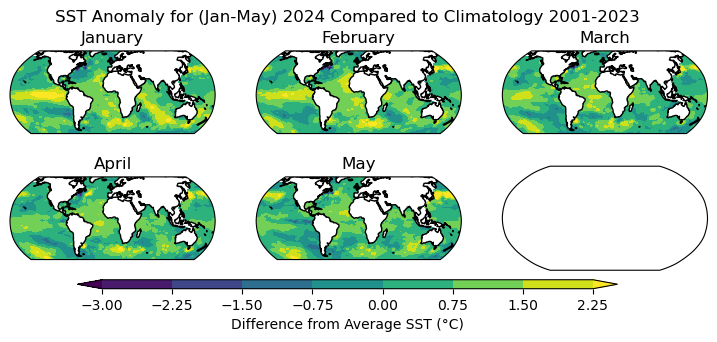

In [59]:
clevs=np.arange(-3,3,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=2,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2024_anom):
    
    ds_toi = ds2024_anom[i].sel(PRES=ds2024_anom[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2024_anom[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2024_anom[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
       
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomaly for (Jan-May) 2024 Compared to Climatology 2001-2023')
plt.savefig('sst anomaly 2024.png', dpi=150)

(6,)


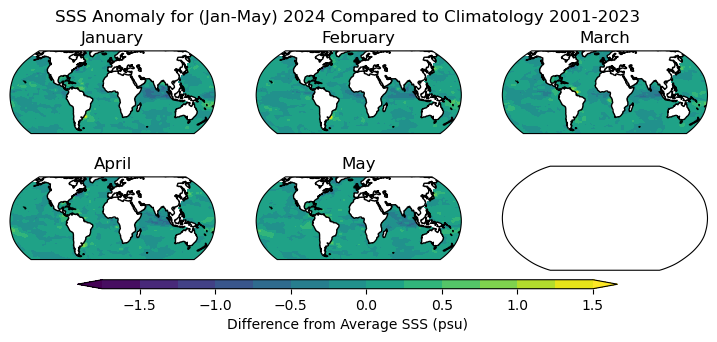

In [60]:
#SSS anomalies for 2024
clevs=np.arange(-1.75,1.75,0.25) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=2,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2024_anom2):
    
    ds_toi = ds2024_anom2[i].sel(PRES=ds2024_anom2[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2024_anom2[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2024_anom2[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
      
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May") 

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SSS (psu)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SSS Anomaly for (Jan-May) 2024 Compared to Climatology 2001-2023')
plt.savefig('sss anomaly 2024.png', dpi=125)

In [61]:
#SST anomalies for 2023
ds231_anom = ds231['TOI'] - jan_mean3
ds232_anom = ds232['TOI'] - feb_mean3
ds233_anom = ds233['TOI'] - march_mean3
ds234_anom = ds234['TOI'] - april_mean3
ds235_anom = ds235['TOI'] - may_mean3
ds236_anom = ds236['TOI'] - june_mean3
ds237_anom = ds237['TOI'] - july_mean3
ds238_anom = ds238['TOI'] - aug_mean3
ds239_anom = ds239['TOI'] - sep_mean3
ds2310_anom = ds2310['TOI'] - oct_mean3
ds2311anom = ds2311['TOI'] - nov_mean3
ds2312_anom = ds2312['TOI'] - dec_mean3
ds2023_anom = [ds231_anom, ds232_anom, ds233_anom, ds234_anom, ds235_anom, ds236_anom, ds237_anom, ds238_anom, ds239_anom, ds2310_anom, ds2311_anom, ds2312_anom]
#ds2023_anom

In [62]:
#SSS anomalies for 2023
ds231_anom2 = ds231['SOI'] - jan_mean4
ds232_anom2 = ds232['SOI'] - feb_mean4
ds233_anom2 = ds233['SOI'] - march_mean4
ds234_anom2 = ds234['SOI'] - april_mean4
ds235_anom2 = ds235['SOI'] - may_mean4
ds236_anom2 = ds236['SOI'] - june_mean4
ds237_anom2 = ds237['SOI'] - july_mean4
ds238_anom2 = ds238['SOI'] - aug_mean4
ds239_anom2 = ds239['SOI'] - sep_mean4
ds2310_anom2 = ds2310['SOI'] - oct_mean4
ds2311_anom2 = ds2311['SOI'] - nov_mean4
ds2312_anom2 = ds2312['SOI'] - dec_mean4
ds2023_anom2 = [ds231_anom2, ds232_anom2, ds233_anom2, ds234_anom2, ds235_anom2, ds236_anom2, ds237_anom2, ds238_anom2, ds239_anom2, ds2310_anom2, ds2311_anom2, ds2312_anom2]
#ds2023_anom2

(12,)


Text(0.5, 0.98, 'SST Anomaly for 2023 Compared to Climatology 2001-2022')

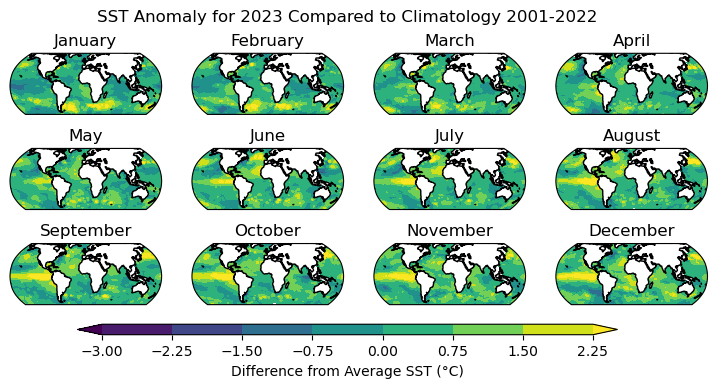

In [63]:
clevs=np.arange(-3,3,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_anom):
    
    ds_toi = ds2023_anom[i].sel(PRES=ds2023_anom[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_anom[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_anom[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomaly for 2023 Compared to Climatology 2001-2022')

(12,)


Text(0.5, 0.98, 'SSS Anomalies for 2023 Compared to Climatology 2001-2022')

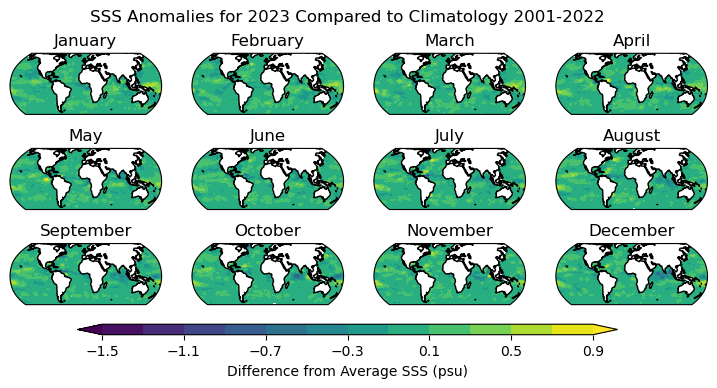

In [64]:
clevs=np.arange(-1.5,1,0.2) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_anom2):
    
    ds_toi = ds2023_anom2[i].sel(PRES=ds2023_anom2[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_anom2[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_anom2[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SSS (psu)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SSS Anomalies for 2023 Compared to Climatology 2001-2022')

In [91]:
nino34_pos_mean = positive.mean()
#nino34_pos_mean
nino34_neg_mean = negative.mean()
#nino34_neg_mean
nino34_neut_mean = neutral.mean()
#nino34_neut_mean

In [92]:
pos_comp = ds2023_anom[i] - nino34_pos_mean

neg_comp = ds2023_anom[i] - nino34_neg_mean
#neg_comp

neut_comp = ds2023_anom[i] - nino34_neut_mean
#neut_comp

comp_sst = [pos_comp, neg_comp, neut_comp]
#comp_sst

## Composite for Nino 3.4 and JAMSTEC Argo 2023 SST Data

(3,)


Text(0.5, 0.98, '2023 Composite SST Anomaly Differences')

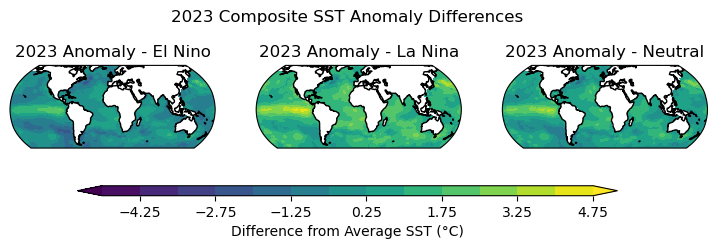

In [93]:
clevs=np.arange(-5,5,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=1,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,2))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(comp_sst):
    
    ds_toi = comp_sst[i].sel(PRES=comp_sst[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=comp_sst[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,comp_sst[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("2023 Anomaly - El Nino")
    axs[1].set_title("2023 Anomaly - La Nina")
    axs[2].set_title("2023 Anomaly - Neutral")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.05]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('2023 Composite SST Anomaly Differences')

In [94]:
#print(positive)
#the years where the average SST anomalies are positive are 2002, 2015, 2019, 2023 (These are the el nino years)

#print(negative)
#the years where the average SST anomalies are negative are 2007, 2008, 2011, 2021, 2022 (These are the la nina years)

#Plot the SST anomaly for the neutral years from the El nino 3.4 index
#print(neutral)
#neutral
#the years where the average SST anomalies are positive are 2001, 2003, 2004, 2005, 2006, 2009, 2010, 2012, 2013, 2014, 2016, 2017, 2018, 2020 (These are the neutral years)

In [95]:
#SST Climatology for 2002, 2015, 2019, 2023 (These are the el nino years)
# January mean SST
jan_sum_nino = ds21+ ds151 + ds191 + ds231
jan_mean_nino = jan_sum_nino['TOI']/4

# Feb mean SST
feb_sum_nino = ds22+ ds152 + ds192 + ds232 
feb_mean_nino = feb_sum_nino['TOI']/4

# March mean SST
march_sum_nino = ds23+ ds153 + ds193 + ds233
march_mean_nino = march_sum_nino['TOI']/4

# April mean SST
april_sum_nino = ds24+ ds154 + ds194 + ds234
april_mean_nino = april_sum_nino['TOI']/4

# May mean SST
may_sum_nino = ds25+ ds155 + ds195+ ds235
may_mean_nino = may_sum_nino['TOI']/4

# June mean SST
june_sum_nino = ds26+ ds156 + ds196+ ds236
june_mean_nino = june_sum_nino['TOI']/4

# July mean SST
july_sum_nino = ds27+ ds157 + ds197+ ds237
july_mean_nino = july_sum_nino['TOI']/4

# Aug mean SST
aug_sum_nino = ds28 + ds158 + ds198+ ds238
aug_mean_nino = aug_sum_nino['TOI']/4

# Sept mean SST
sep_sum_nino = ds29+ ds159 + ds199+ ds239
sep_mean_nino = sep_sum_nino['TOI']/4

# Oct mean SST
oct_sum_nino =  ds210+ ds1510 + ds1910+ ds2310
oct_mean_nino = oct_sum_nino['TOI']/4

# Nov mean SST
nov_sum_nino =  ds211+ ds1511+ ds1911+ ds2311
nov_mean_nino = nov_sum_nino['TOI']/4

# Dec mean SST
dec_sum_nino =  ds212+ ds1512 + ds1912+ ds2312
dec_mean_nino = dec_sum_nino['TOI']/4

In [96]:
#The difference between JAMSTEC 2023 monthly anomaly and Mean Anomaly for El Nino Years
sss_clim_nino = [jan_mean_nino, feb_mean_nino, march_mean_nino, april_mean_nino, may_mean_nino, june_mean_nino, july_mean_nino, aug_mean_nino, sep_mean_nino, oct_mean_nino, nov_mean_nino, dec_mean_nino]
#sss_clim_nino

#El nino SST monthly anomaly compared to climatology for El Nino Years
ds231_nino = ds231['TOI'] - jan_mean_nino
ds232_nino = ds232['TOI'] - feb_mean_nino
ds233_nino = ds233['TOI'] - march_mean_nino
ds234_nino = ds234['TOI'] - april_mean_nino
ds235_nino = ds235['TOI'] - may_mean_nino
ds236_nino = ds236['TOI'] - june_mean_nino
ds237_nino = ds237['TOI'] - july_mean_nino
ds238_nino = ds238['TOI'] - aug_mean_nino
ds239_nino = ds239['TOI'] - sep_mean_nino
ds2310_nino = ds2310['TOI'] - oct_mean_nino
ds2311_nino = ds2311['TOI'] - nov_mean_nino
ds2312_nino = ds2312['TOI'] - dec_mean_nino
ds2023_nino = [ds231_nino, ds232_nino, ds233_nino, ds234_nino, ds235_nino, ds236_nino, ds237_nino, ds238_nino, ds239_nino, ds2310_nino, ds2311_nino, ds2312_nino]
#ds2023_nino

(12,)


Text(0.5, 0.98, 'SST Anomaly for 2023 Compared to Climatology for El Nino Years')

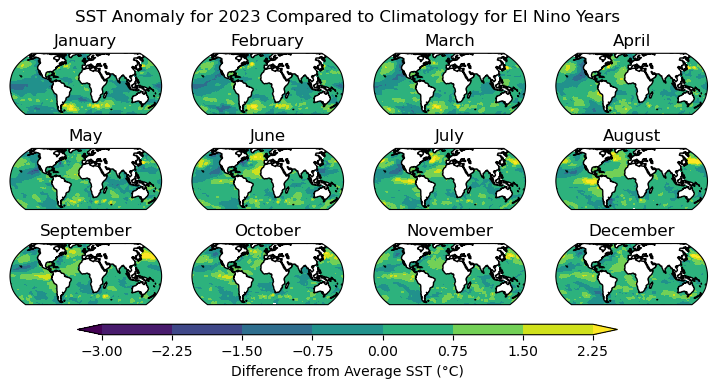

In [97]:
clevs=np.arange(-3,3,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_nino):
    
    ds_toi = ds2023_nino[i].sel(PRES=ds2023_nino[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_nino[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_nino[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomaly for 2023 Compared to Climatology for El Nino Years')

In [98]:
#SST Climatology for the years where the average SST anomalies are negative are 2007, 2008, 2011, 2021, 2022 (These are the la nina years)
# January mean SST
#SST Climatology 2001-2022
# January mean SST
jan_sum_nina = ds71 + ds81 +ds111+ ds211 + ds221
jan_mean_nina = jan_sum_nina['TOI']/5

# Feb mean SST
feb_sum_nina = ds72 + ds82 +ds112+ ds212 + ds222 
feb_mean_nina = feb_sum_nina['TOI']/5

# March mean SST
march_sum_nina =ds73 + ds83 + ds113+ ds213 + ds223
march_mean_nina = march_sum_nina['TOI']/5

# April mean SST
april_sum_nina = ds74 + ds84 + ds114+ ds214 + ds224
april_mean_nina = april_sum_nina['TOI']/5

# May mean SST
may_sum_nina =  ds75 + ds85 + ds115+ ds215 + ds225
may_mean_nina = may_sum_nina['TOI']/5

# June mean SST
june_sum_nina = ds76 + ds86 + ds116+ ds216 + ds226
june_mean_nina = june_sum_nina['TOI']/5

# July mean SST
july_sum_nina = ds77 + ds87 + ds117 + ds217 + ds227
july_mean_nina = july_sum_nina['TOI']/5

# Aug mean SST
aug_sum_nina = ds78 + ds88 + ds118+ ds218 + ds228
aug_mean_nina = aug_sum_nina['TOI']/5

# Sept mean SST
sep_sum_nina = ds79 + ds89 + ds119+ ds219 + ds229
sep_mean_nina = sep_sum_nina['TOI']/5

# Oct mean SST
oct_sum_nina = ds710 + ds810 + ds1110+ ds2110 + ds2210
oct_mean_nina = oct_sum_nina['TOI']/5

# Nov mean SST
nov_sum_nina = ds711 + ds811 + ds1111+ ds2111 + ds2211
nov_mean_nina = nov_sum_nina['TOI']/5

# Dec mean SST
dec_sum_nina= ds712 + ds812 + ds1112 + ds2112 + ds2212
dec_mean_nina = dec_sum_nina['TOI']/5

In [99]:
#The difference between JAMSTEC 2023 monthly anomaly and Mean Anomaly for La Nina Years
sss_clim_nina = [jan_mean_nina, feb_mean_nina, march_mean_nina, april_mean_nina, may_mean_nina, june_mean_nina, july_mean_nina, aug_mean_nina, sep_mean_nina, oct_mean_nina, nov_mean_nina, dec_mean_nina]
#sss_clim_nina

#El nina SST monthly anomaly compared to climatology for El nina Years
ds231_nina = ds231['TOI'] - jan_mean_nina
ds232_nina = ds232['TOI'] - feb_mean_nina
ds233_nina = ds233['TOI'] - march_mean_nina
ds234_nina = ds234['TOI'] - april_mean_nina
ds235_nina = ds235['TOI'] - may_mean_nina
ds236_nina = ds236['TOI'] - june_mean_nina
ds237_nina = ds237['TOI'] - july_mean_nina
ds238_nina = ds238['TOI'] - aug_mean_nina
ds239_nina = ds239['TOI'] - sep_mean_nina
ds2310_nina = ds2310['TOI'] - oct_mean_nina
ds2311_nina = ds2311['TOI'] - nov_mean_nina
ds2312_nina = ds2312['TOI'] - dec_mean_nina
ds2023_nina = [ds231_nina, ds232_nina, ds233_nina, ds234_nina, ds235_nina, ds236_nina, ds237_nina, ds238_nina, ds239_nina, ds2310_nina, ds2311_nina, ds2312_nina]
#ds2023_nina

(12,)


Text(0.5, 0.98, 'SST Anomaly for 2023 Compared to Climatology for La Nina Years')

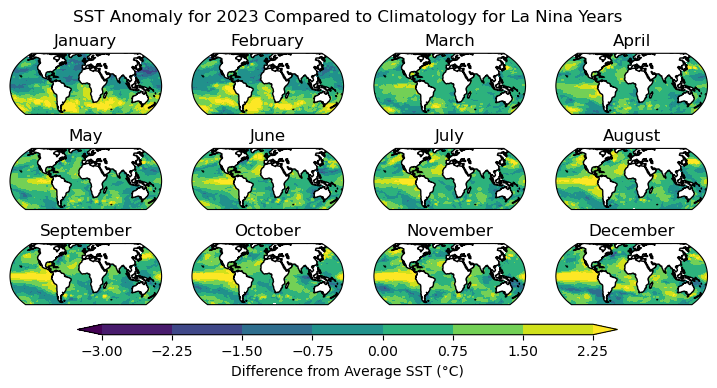

In [100]:
clevs=np.arange(-3,3,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_nina):
    
    ds_toi = ds2023_nina[i].sel(PRES=ds2023_nina[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_nina[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_nina[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomaly for 2023 Compared to Climatology for La Nina Years')

In [101]:
#SST Climatology for the years where the average SST anomalies are neutral are 2001, 2003, 2004, 2005, 2006, 2009, 2010, 2012, 2013, 2014, 2016, 2017, 2018, 2020 (These are the neutral years)
# January mean SST
jan_sum_n = ds11 + ds31 + ds41 + ds51+ ds61 + ds91 + ds101 + ds121+ ds131+ ds141 + ds161 + ds171 + ds181 + ds201
jan_mean_n = jan_sum_n['TOI']/14

# Feb mean SST
feb_sum_n = ds12 + ds32 + ds42 + ds52+ ds62 + ds92 + ds102 + ds112+ ds132+ ds142 + ds162 + ds172+ ds182+ ds202 
feb_mean_n = feb_sum_n['TOI']/14

# March mean SST
march_sum_n = ds13 + ds33 + ds43 + ds53+ ds63 + ds93 + ds103 + ds123+  ds133+ ds143 + ds163 + ds173+ ds183+ ds203
march_mean_n = march_sum_n['TOI']/14

# April mean SST
april_sum_n = ds14 + ds34 + ds44 + ds54+ ds64 + ds94 + ds104 + ds124+  ds134+ ds144 + ds164 + ds174+ ds184+ ds204
april_mean_n = april_sum_n['TOI']/14


# May mean SST
may_sum_n = ds15 + ds35 + ds45 + ds55+ ds65 + ds95 + ds105 + ds125+  ds135+ ds145 + ds165 + ds175+ ds185+ ds205
may_mean_n = may_sum_n['TOI']/14

# June mean SST
june_sum_n = ds16 + ds36 + ds46 + ds56+ ds66 + ds96 + ds106 + ds126+  ds136+ ds146 + ds166 + ds176+ ds186+ ds206
june_mean_n = june_sum_n['TOI']/14

# July mean SST
july_sum_n = ds17 + ds37 + ds47 + ds57+ ds67 + ds97 + ds107 + ds127+  ds137+ ds147 + ds167 + ds177+ ds187+ ds207
july_mean_n= july_sum_n['TOI']/14

# Aug mean SST
aug_sum_n = ds18 + ds38 + ds48 + ds58+ ds68 + ds98 + ds108 + ds128+  ds138+ ds148 + ds168 + ds178+ ds188+ ds208
aug_mean_n = aug_sum_n['TOI']/14

# Sept mean SST
sep_sum_n = ds19 + ds39 + ds49 + ds59+ ds69 + ds99 + ds109 + ds129+  ds139+ ds149 + ds169 + ds179+ ds189+ ds209
sep_mean_n = sep_sum_n['TOI']/14

# Oct mean SST
oct_sum_n = ds110 + ds310 + ds410 + ds510+ ds610 + ds910 + ds1010 + ds1210+  ds1310+ ds1410 + ds1610 + ds1710+ ds1810+ ds2010
oct_mean_n = oct_sum_n['TOI']/14

# Nov mean SST
nov_sum_n = ds111 + ds311 + ds411 + ds511+ ds611 + ds911 + ds1011 + ds1211+  ds1311+ ds1411 + ds1611 + ds1711+ ds1811+ ds2011
nov_mean_n = nov_sum_n['TOI']/14

# Dec mean SST
dec_sum_n = ds112 + ds312 + ds412 + ds512+ ds612 + ds912 + ds1012 + ds1212+  ds1312+ ds1412 + ds1612 + ds1712+ ds1812+ ds2012
dec_mean_n = dec_sum_n['TOI']/14

In [102]:
#The difference between JAMSTEC 2023 monthly anomaly and Mean Anomaly for Neutral Years
sss_clim_n = [jan_mean_n, feb_mean_n, march_mean_n, april_mean_n, may_mean_n, june_mean_n, july_mean_n, aug_mean_n, sep_mean_n, oct_mean_n, nov_mean_n, dec_mean_n]
#sss_clim_n

#Neutral SST monthly anomaly compared to climatology for El n Years
ds231_n = ds231['TOI'] - jan_mean_n
ds232_n = ds232['TOI'] - feb_mean_n
ds233_n = ds233['TOI'] - march_mean_n
ds234_n = ds234['TOI'] - april_mean_n
ds235_n = ds235['TOI'] - may_mean_n
ds236_n = ds236['TOI'] - june_mean_n
ds237_n = ds237['TOI'] - july_mean_n
ds238_n = ds238['TOI'] - aug_mean_n
ds239_n = ds239['TOI'] - sep_mean_n
ds2310_n = ds2310['TOI'] - oct_mean_n
ds2311_n = ds2311['TOI'] - nov_mean_n
ds2312_n = ds2312['TOI'] - dec_mean_n
ds2023_n = [ds231_n, ds232_n, ds233_n, ds234_n, ds235_n, ds236_n, ds237_n, ds238_n, ds239_n, ds2310_n, ds2311_n, ds2312_n]
#ds2023_n

(12,)


Text(0.5, 0.98, 'SST Anomaly for 2023 Compared to Climatology for Neutral Years')

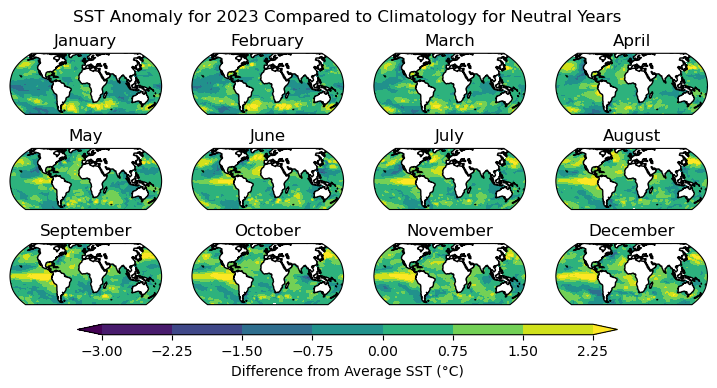

In [103]:
clevs=np.arange(-3,3,0.75) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_n):
    
    ds_toi = ds2023_n[i].sel(PRES=ds2023_n[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_n[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_n[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SST Anomaly for 2023 Compared to Climatology for Neutral Years')

In [104]:
pos_comp = ds2023_anom[i] - ds2023_nino[i]

neg_comp = ds2023_anom[i] - ds2023_nina[i]

#neg_comp

neut_comp = ds2023_anom[i] - ds2023_n[i]

#neut_comp

comp_sst = [pos_comp, neg_comp, neut_comp]
#comp_sst

(3,)


Text(0.5, 0.98, '2023 Composite SST Anomaly Differences')

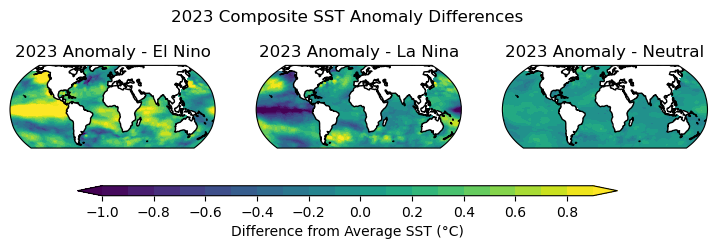

In [105]:
clevs=np.arange(-1,1,0.1) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=1,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,2))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(comp_sst):
    
    ds_toi = comp_sst[i].sel(PRES=comp_sst[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=comp_sst[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,comp_sst[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("2023 Anomaly - El Nino")
    axs[1].set_title("2023 Anomaly - La Nina")
    axs[2].set_title("2023 Anomaly - Neutral")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.05]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('2023 Composite SST Anomaly Differences')

In [106]:
pos_neut = ds2023_nino[i] - ds2023_n[i]
neg_neut = ds2023_nina[i] - ds2023_n[i]
comp_sst_neut = [pos_neut, neg_neut]

(2,)


Text(0.5, 0.98, '2023 Composite SST Differences during ENSO')

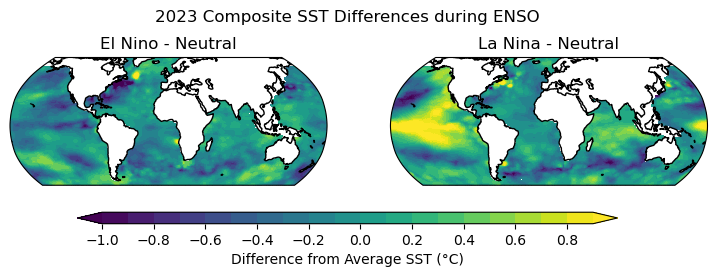

In [107]:
clevs=np.arange(-1,1,0.1) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=1,ncols=2, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,2.3))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(comp_sst_neut):
    
    ds_toi = comp_sst_neut[i].sel(PRES=comp_sst_neut[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=comp_sst_neut[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,comp_sst_neut[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("El Nino - Neutral")
    axs[1].set_title("La Nina - Neutral")
    
    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.05]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SST (\u00B0C)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('2023 Composite SST Differences during ENSO')

In [133]:
#SSS Climatology for 2002, 2015, 2019, 2023 (These are the el nino years)
# January mean SST
jan_sum_nino_SSS = ds21+ ds151 + ds191 + ds231
jan_mean_nino_SSS = jan_sum_nino_SSS['SOI']/4

# Feb mean SST
feb_sum_nino_SSS = ds22+ ds152 + ds192 + ds232 
feb_mean_nino_SSS = feb_sum_nino_SSS['SOI']/4

# March mean SST
march_sum_nino_SSS = ds23+ ds153 + ds193 + ds233
march_mean_nino_SSS = march_sum_nino_SSS['SOI']/4

# April mean SST
april_sum_nino_SSS = ds24+ ds154 + ds194 + ds234
april_mean_nino_SSS = april_sum_nino_SSS['SOI']/4

# May mean SST
may_sum_nino_SSS = ds25+ ds155 + ds195+ ds235
may_mean_nino_SSS = may_sum_nino_SSS['SOI']/4

# June mean SST
june_sum_nino_SSS = ds26+ ds156 + ds196+ ds236
june_mean_nino_SSS = june_sum_nino_SSS['SOI']/4

# July mean SST
july_sum_nino_SSS = ds27+ ds157 + ds197+ ds237
july_mean_nino_SSS = july_sum_nino_SSS['SOI']/4

# Aug mean SST
aug_sum_nino_SSS = ds28 + ds158 + ds198+ ds238
aug_mean_nino_SSS = aug_sum_nino_SSS['SOI']/4

# Sept mean SST
sep_sum_nino_SSS = ds29+ ds159 + ds199+ ds239
sep_mean_nino_SSS = sep_sum_nino_SSS['SOI']/4

# Oct mean SST
oct_sum_nino_SSS =  ds210+ ds1510 + ds1910+ ds2310
oct_mean_nino_SSS = oct_sum_nino_SSS['SOI']/4

# Nov mean SST
nov_sum_nino_SSS =  ds211+ ds1511+ ds1911+ ds2311
nov_mean_nino_SSS = nov_sum_nino_SSS['SOI']/4

# Dec mean SST
dec_sum_nino_SSS =  ds212+ ds1512 + ds1912+ ds2312
dec_mean_nino_SSS = dec_sum_nino_SSS['SOI']/4

In [134]:
#The difference between JAMSTEC 2023 monthly anomaly and Mean Anomaly for El Nino Years

#El nino SSS monthly anomaly compared to climatology for El Nino Years
ds231_nino_SSS = ds231['SOI'] - jan_mean_nino_SSS
ds232_nino_SSS = ds232['SOI'] - feb_mean_nino_SSS
ds233_nino_SSS = ds233['SOI'] - march_mean_nino_SSS
ds234_nino_SSS = ds234['SOI'] - april_mean_nino_SSS
ds235_nino_SSS = ds235['SOI'] - may_mean_nino_SSS
ds236_nino_SSS = ds236['SOI'] - june_mean_nino_SSS
ds237_nino_SSS = ds237['SOI'] - july_mean_nino_SSS
ds238_nino_SSS = ds238['SOI'] - aug_mean_nino_SSS
ds239_nino_SSS = ds239['SOI'] - sep_mean_nino_SSS
ds2310_nino_SSS = ds2310['SOI'] - oct_mean_nino_SSS
ds2311_nino_SSS = ds2311['SOI'] - nov_mean_nino_SSS
ds2312_nino_SSS = ds2312['SOI'] - dec_mean_nino_SSS
ds2023_nino_SSS = [ds231_nino_SSS, ds232_nino_SSS, ds233_nino_SSS, ds234_nino_SSS, ds235_nino_SSS, ds236_nino_SSS, ds237_nino_SSS, ds238_nino_SSS, ds239_nino_SSS, ds2310_nino_SSS, ds2311_nino_SSS, ds2312_nino_SSS]
#ds2023_nino_SSS

(12,)


Text(0.5, 0.98, 'SSS Anomaly for 2023 Compared to Climatology for El Nino Years')

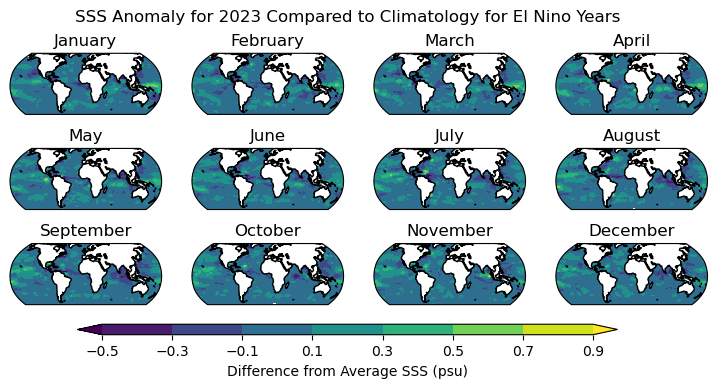

In [154]:
clevs=np.arange(-0.5,1,0.2) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_nino_SSS):
    
    ds_toi = ds2023_nino_SSS[i].sel(PRES=ds2023_nino_SSS[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_nino_SSS[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_nino_SSS[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SSS (psu)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SSS Anomaly for 2023 Compared to Climatology for El Nino Years')

In [152]:
#SSS Climatology for the years where the average SST anomalies are negative are 2007, 2008, 2011, 2021, 2022 (These are the la nina years)
# January mean SSS
#SST Climatology 2001-2022
# January mean SSTS
jan_sum_nina_SSS = ds71 + ds81 +ds111+ ds211 + ds221
jan_mean_nina_SSS = jan_sum_nina_SSS['SOI']/5

# Feb mean SSS
feb_sum_nina_SSS = ds72 + ds82 +ds112+ ds212 + ds222 
feb_mean_nina_SSS = feb_sum_nina_SSS['SOI']/5

# March mean SSS
march_sum_nina_SSS =ds73 + ds83 + ds113+ ds213 + ds223
march_mean_nina_SSS = march_sum_nina_SSS['SOI']/5

# April mean SSS
april_sum_nina_SSS = ds74 + ds84 + ds114+ ds214 + ds224
april_mean_nina_SSS = april_sum_nina_SSS['SOI']/5

# May mean SSS
may_sum_nina_SSS =  ds75 + ds85 + ds115+ ds215 + ds225
may_mean_nina_SSS = may_sum_nina_SSS['SOI']/5

# June mean SSS
june_sum_nina_SSS = ds76 + ds86 + ds116+ ds216 + ds226
june_mean_nina_SSS = june_sum_nina_SSS['SOI']/5

# July mean SSS
july_sum_nina_SSS = ds77 + ds87 + ds117 + ds217 + ds227
july_mean_nina_SSS = july_sum_nina_SSS['SOI']/5

# Aug mean SSS
aug_sum_nina_SSS = ds78 + ds88 + ds118+ ds218 + ds228
aug_mean_nina_SSS = aug_sum_nina_SSS['SOI']/5

# Sept mean SSS
sep_sum_nina_SSS = ds79 + ds89 + ds119+ ds219 + ds229
sep_mean_nina_SSS = sep_sum_nina_SSS['SOI']/5

# Oct mean SSS
oct_sum_nina_SSS = ds710 + ds810 + ds1110+ ds2110 + ds2210
oct_mean_nina_SSS = oct_sum_nina_SSS['SOI']/5

# Nov mean SSS
nov_sum_nina_SSS = ds711 + ds811 + ds1111+ ds2111 + ds2211
nov_mean_nina_SSS = nov_sum_nina_SSS['SOI']/5

# Dec mean SSS
dec_sum_nina_SSS= ds712 + ds812 + ds1112 + ds2112 + ds2212
dec_mean_nina_SSS = dec_sum_nina_SSS['SOI']/5

In [137]:
#The difference between JAMSTEC 2023 monthly anomaly and Mean Anomaly for El Nina Years

#El nina SST monthly anomaly compared to climatology for El nina Years
ds231_nina_SSS = ds231['SOI'] - jan_mean_nina_SSS
ds232_nina_SSS = ds232['SOI'] - feb_mean_nina_SSS
ds233_nina_SSS = ds233['SOI'] - march_mean_nina_SSS
ds234_nina_SSS = ds234['SOI'] - april_mean_nina_SSS
ds235_nina_SSS = ds235['SOI'] - may_mean_nina_SSS
ds236_nina_SSS = ds236['SOI'] - june_mean_nina_SSS
ds237_nina_SSS = ds237['SOI'] - july_mean_nina_SSS
ds238_nina_SSS = ds238['SOI'] - aug_mean_nina_SSS
ds239_nina_SSS = ds239['SOI'] - sep_mean_nina_SSS
ds2310_nina_SSS = ds2310['SOI'] - oct_mean_nina_SSS
ds2311_nina_SSS = ds2311['SOI'] - nov_mean_nina_SSS
ds2312_nina_SSS = ds2312['SOI'] - dec_mean_nina_SSS
ds2023_nina_SSS = [ds231_nina_SSS, ds232_nina_SSS, ds233_nina_SSS, ds234_nina_SSS, ds235_nina_SSS, ds236_nina_SSS, ds237_nina_SSS, ds238_nina_SSS, ds239_nina_SSS, ds2310_nina_SSS, ds2311_nina_SSS, ds2312_nina_SSS]
#ds2023_nina_SSS

(12,)


Text(0.5, 0.98, 'SSS Anomaly for 2023 Compared to Climatology for La Nina Years')

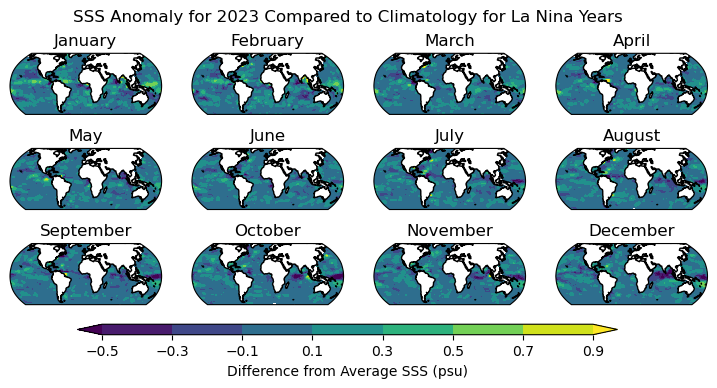

In [150]:
clevs=np.arange(-0.5,1,0.2) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_nina_SSS):
    
    ds_toi = ds2023_nina_SSS[i].sel(PRES=ds2023_nina_SSS[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_nina_SSS[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_nina_SSS[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SSS (psu)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SSS Anomaly for 2023 Compared to Climatology for La Nina Years')

In [155]:
#SST Climatology for the years where the average SST anomalies are neutral are 2001, 2003, 2004, 2005, 2006, 2009, 2010, 2012, 2013, 2014, 2016, 2017, 2018, 2020 (These are the neutral years)
# January mean SST
jan_sum_n_SSS = ds11 + ds31 + ds41 + ds51+ ds61 + ds91 + ds101 + ds121+ ds131+ ds141 + ds161 + ds171 + ds181 + ds201
jan_mean_n_SSS = jan_sum_n_SSS['SOI']/14

# Feb mean SST
feb_sum_n_SSS = ds12 + ds32 + ds42 + ds52+ ds62 + ds92 + ds102 + ds112+ ds132+ ds142 + ds162 + ds172+ ds182+ ds202 
feb_mean_n_SSS = feb_sum_n_SSS['SOI']/14

# March mean SST
march_sum_n_SSS = ds13 + ds33 + ds43 + ds53+ ds63 + ds93 + ds103 + ds123+  ds133+ ds143 + ds163 + ds173+ ds183+ ds203
march_mean_n_SSS = march_sum_n_SSS['SOI']/14

# April mean SST
april_sum_n_SSS = ds14 + ds34 + ds44 + ds54+ ds64 + ds94 + ds104 + ds124+  ds134+ ds144 + ds164 + ds174+ ds184+ ds204
april_mean_n_SSS = april_sum_n_SSS['SOI']/14


# May mean SST
may_sum_n_SSS = ds15 + ds35 + ds45 + ds55+ ds65 + ds95 + ds105 + ds125+  ds135+ ds145 + ds165 + ds175+ ds185+ ds205
may_mean_n_SSS = may_sum_n_SSS['SOI']/14

# June mean SST
june_sum_n_SSS = ds16 + ds36 + ds46 + ds56+ ds66 + ds96 + ds106 + ds126+  ds136+ ds146 + ds166 + ds176+ ds186+ ds206
june_mean_n_SSS = june_sum_n_SSS['SOI']/14

# July mean SST
july_sum_n_SSS = ds17 + ds37 + ds47 + ds57+ ds67 + ds97 + ds107 + ds127+  ds137+ ds147 + ds167 + ds177+ ds187+ ds207
july_mean_n_SSS= july_sum_n_SSS['SOI']/14

# Aug mean SST
aug_sum_n_SSS = ds18 + ds38 + ds48 + ds58+ ds68 + ds98 + ds108 + ds128+  ds138+ ds148 + ds168 + ds178+ ds188+ ds208
aug_mean_n_SSS = aug_sum_n_SSS['SOI']/14

# Sept mean SST
sep_sum_n_SSS = ds19 + ds39 + ds49 + ds59+ ds69 + ds99 + ds109 + ds129+  ds139+ ds149 + ds169 + ds179+ ds189+ ds209
sep_mean_n_SSS = sep_sum_n_SSS['SOI']/14

# Oct mean SST
oct_sum_n_SSS = ds110 + ds310 + ds410 + ds510+ ds610 + ds910 + ds1010 + ds1210+  ds1310+ ds1410 + ds1610 + ds1710+ ds1810+ ds2010
oct_mean_n_SSS = oct_sum_n_SSS['SOI']/14

# Nov mean SST
nov_sum_n_SSS = ds111 + ds311 + ds411 + ds511+ ds611 + ds911 + ds1011 + ds1211+  ds1311+ ds1411 + ds1611 + ds1711+ ds1811+ ds2011
nov_mean_n_SSS = nov_sum_n_SSS['SOI']/14

# Dec mean SST
dec_sum_n_SSS = ds112 + ds312 + ds412 + ds512+ ds612 + ds912 + ds1012 + ds1212+  ds1312+ ds1412 + ds1612 + ds1712+ ds1812+ ds2012
dec_mean_n_SSS = dec_sum_n_SSS['SOI']/14

In [156]:
#The difference between JAMSTEC 2023 monthly anomaly and Mean Anomaly for Neutral Years


#Neutral SSS monthly anomaly compared to climatology for El n Years
ds231_n_SSS = ds231['SOI'] - jan_mean_n_SSS
ds232_n_SSS = ds232['SOI'] - feb_mean_n_SSS
ds233_n_SSS = ds233['SOI'] - march_mean_n_SSS
ds234_n_SSS = ds234['SOI'] - april_mean_n_SSS
ds235_n_SSS = ds235['SOI'] - may_mean_n_SSS
ds236_n_SSS = ds236['SOI'] - june_mean_n_SSS
ds237_n_SSS = ds237['SOI'] - july_mean_n_SSS
ds238_n_SSS = ds238['SOI'] - aug_mean_n_SSS
ds239_n_SSS = ds239['SOI'] - sep_mean_n_SSS
ds2310_n_SSS = ds2310['SOI'] - oct_mean_n_SSS
ds2311_n_SSS = ds2311['SOI'] - nov_mean_n_SSS
ds2312_n_SSS = ds2312['SOI'] - dec_mean_n_SSS
ds2023_n_SSS = [ds231_n_SSS, ds232_n_SSS, ds233_n_SSS, ds234_n_SSS, ds235_n_SSS, ds236_n_SSS, ds237_n_SSS, ds238_n_SSS, ds239_n_SSS, ds2310_n_SSS, ds2311_n_SSS, ds2312_n_SSS]
#ds2023_n_SSS

(12,)


Text(0.5, 0.98, 'SSS Anomaly for 2023 Compared to Climatology for Neutral Years')

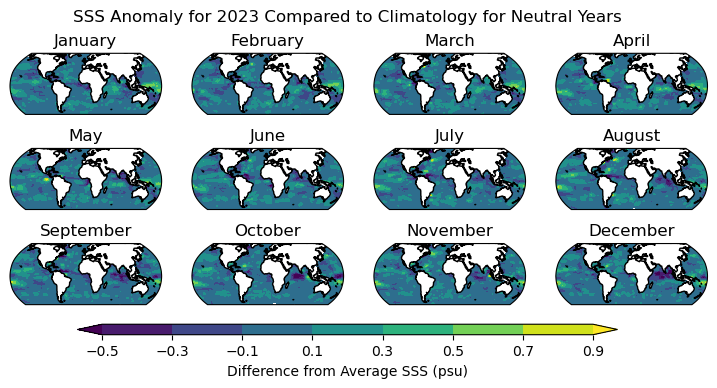

In [159]:
clevs=np.arange(-0.5,1,0.2) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=3,ncols=4, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,3.5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds2023_n_SSS):
    
    ds_toi = ds2023_n_SSS[i].sel(PRES=ds2023_n_SSS[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=ds2023_n_SSS[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds2023_n_SSS[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("January")
    axs[1].set_title("February")
    axs[2].set_title("March")
    axs[3].set_title("April")
    axs[4].set_title("May")
    axs[5].set_title("June")
    axs[6].set_title("July")
    axs[7].set_title("August")
    axs[8].set_title("September")
    axs[9].set_title("October")
    axs[10].set_title("November")
    axs[11].set_title("December")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SSS (psu)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SSS Anomaly for 2023 Compared to Climatology for Neutral Years')

In [160]:
pos_comp2 = ds2023_anom[i] - ds2023_nino_SSS[i]

neg_comp2 = ds2023_anom[i] - ds2023_nina_SSS[i]

#neg_comp2

neut_comp2 = ds2023_anom[i] - ds2023_n_SSS[i]

#neut_comp2

comp_sss = [pos_comp2, neg_comp2, neut_comp2]
#comp_sss

(3,)


Text(0.5, 0.98, '2023 Composite SSS Anomaly Differences')

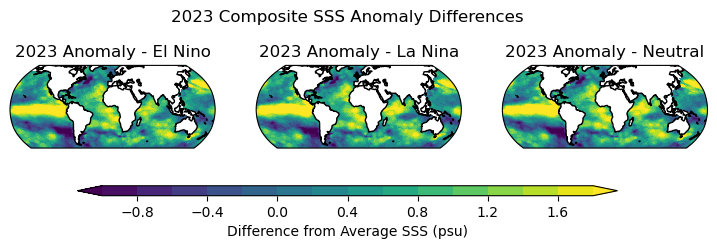

In [164]:
clevs=np.arange(-1,2,0.2) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=1,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,2))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(comp_sss):
    
    ds_toi = comp_sss[i].sel(PRES=comp_sss[i].PRES.values[0])
   
    ds_toi,lons=add_cyclic_point(ds_toi,coord=comp_sss[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,comp_sss[i]['LATITUDE'],ds_toi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
    
    axs[0].set_title("2023 Anomaly - El Nino")
    axs[1].set_title("2023 Anomaly - La Nina")
    axs[2].set_title("2023 Anomaly - Neutral")

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.05]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Difference from Average SSS (psu)') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('2023 Composite SSS Anomaly Differences')